## PROJECT PROBLEM

DATA SCIENCE CAPSTONE PROJECT: Project Brief Crime in Chicago has been worrisome to the Chicago PD. Reported crimes have been tracked on a daily basis since 2001 and have been provided in the project data file. The Chicago PD would like to drastically reduce the spate of violent crimes reported in the city. Being effective involves knowing crime patterns and where they are likely to occur. It also involves equipping the Police Department appropriately. They have recruited you to conduct full data analytics and predictive modeling to uncover insights from the data that can be used to effectively mobilize and respond to crimes in shorter time cycles. They are interested in gleaning any insights that can help them determine What type of crimes to prepare for, Where these crimes are most likely to occur, What days of the week and periods to expect these crimes Task Conduct complete data analytics and predictive modeling to predict crime types by day type and district

## INTRODUCTION

All around the world, security of lives and properties is increasingly becoming one  of  the  most significant concerns. Government and security agencies are devising different strategies to prevent crimes and protect their people. Therefore, there is a strong need to identify crime patterns and analyze different areas of crime. As a Data Scientist, my contribution towards ameliorating crime would be developing a solution that would be able to predict crime before they happen. This would proffer long lasting solutions to the menace of crime especially in Chicago. 
The Chicago crime data as provided by OneCampus Academy will be used for this purpose.

The dataset used in this project is the Chicago crime data which consists of 23 features and 2,278,726
observations. This dataset reflects reported incidents of crime (except for murders where data exists for each victim) that occurred in the City of Chicago from 2001 to 2022. The data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system

This project aims to profile crime cases in Chicago that would help the Chicago Police Department drastically reduce crime by knowing the patterns, where they are likely to occur and the time they are likely to occur. Therefore, the aim of the Project is to build a model that would be able to predict crimes location (I have used Ward as location), day and time these crimes are likely to occur.

## IMPORTING LIBRARIES

In [1]:
# importing the initial libraries required to load and peep the data
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## LOADING DATASET

In [3]:
data = pd.read_csv('C:/Users/ACER/Documents/WorkSpace/crime_data_Proj1.csv')

## DATA WRANGLING

In [4]:
data.head()

Unnamed: 0        ID Case Number                    Date  \
0           0   6407111    HP485721  07/26/2008 02:30:00 PM   
1           1  11398199    JB372830  07/31/2018 10:57:00 AM   
2           2   5488785    HN308568  04/27/2007 10:30:00 AM   
3           3  11389116    JB361368  07/23/2018 08:55:00 AM   
4           4  12420431    JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR       Primary Type               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  ...  Ward  Community Area  \
0                                  STREET   False  ...  10.0            46.0   
1                               POOL ROOM    True  ...   8.0            47.0   
2                               RESIDENCE    True  ...  39.0            12.0   
3            NURSING HOME/RETIREMENT HOME   False  ...  28.0            26.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False  ...  27.0            28.0   

   FBI Code  X Coordinate  Y Coordinate  Year              Updated On  \
0        14     1196638.0     1848800.0  2008  02/28/2018 03:56:25 PM   
1        15     1184499.0     1843935.0  2018  08/07/2018 04:02:59 PM   
2        05     1146911.0     1941022.0  2007  02/28/2018 03:56:25 PM   
3       08A     1148388.0     1899882.0  2018  07/30/2018 03:52:24 PM   
4       04A     1165430.0     1897441.0  2021  07/18/2021 04:56:02 PM   

    Latitude  Longitude                       Location  
0  41.739980 -87.555120  (41.739979622, -87.555120042)  
1  41.726922 -87.599747  (41.726922145, -87.599746995)  
2  41.994138 -87.734959  (41.994137622, -87.734959049)  
3  41.881217 -87.730590  (41.881217483, -87.730589961)  
4  41.874174 -87.668082  (41.874173691, -87.668082118)  

[5 rows x 23 columns]

In [5]:
#Checking the number of features and obervations
data.shape

(2278726, 23)

In [6]:
#Checking to see more information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [7]:
#Checking for missing values
data.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  1
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      2877
Arrest                       0
Domestic                     0
Beat                         0
District                    12
Ward                    184695
Community Area          184267
FBI Code                     0
X Coordinate             23985
Y Coordinate             23985
Year                         0
Updated On                   0
Latitude                 23985
Longitude                23985
Location                 23985
dtype: int64

In [8]:
data.describe().T

count          mean           std          min  \
Unnamed: 0      2278726.0  1.139362e+06  6.578117e+05     0.000000   
ID              2278726.0  6.882068e+06  3.419168e+06   637.000000   
Beat            2278726.0  1.186442e+03  7.026836e+02   111.000000   
District        2278714.0  1.129072e+01  6.946692e+00     1.000000   
Ward            2094031.0  2.272764e+01  1.383464e+01     1.000000   
Community Area  2094459.0  3.752140e+01  2.153282e+01     0.000000   
X Coordinate    2254741.0  1.164569e+06  1.673955e+04     0.000000   
Y Coordinate    2254741.0  1.885747e+06  3.209855e+04     0.000000   
Year            2278726.0  2.009638e+03  6.019724e+00  2001.000000   
Latitude        2254741.0  4.184209e+01  8.830434e-02    36.619446   
Longitude       2254741.0 -8.767161e+01  6.073538e-02   -91.686566   

                         25%           50%           75%           max  
Unnamed: 0      5.696812e+05  1.139362e+06  1.709044e+06  2.278725e+06  
ID              3.716076e+06  6.885990e+06  9.887568e+06  1.278199e+07  
Beat            6.210000e+02  1.034000e+03  1.731000e+03  2.535000e+03  
District        6.000000e+00  1.000000e+01  1.700000e+01  3.100000e+01  
Ward            1.000000e+01  2.300000e+01  3.400000e+01  5.000000e+01  
Community Area  2.300000e+01  3.200000e+01  5.700000e+01  7.700000e+01  
X Coordinate    1.152948e+06  1.166060e+06  1.176365e+06  1.205119e+06  
Y Coordinate    1.859053e+06  1.890673e+06  1.909219e+06  1.951622e+06  
Year            2.004000e+03  2.009000e+03  2.014000e+03  2.022000e+03  
Latitude        4.176866e+01  4.185578e+01  4.190668e+01  4.202291e+01  
Longitude      -8.771379e+01 -8.766597e+01 -8.762823e+01 -8.752453e+01

In [9]:
#Checking for duplicates in the dataset
sum(data.duplicated())

0

In [10]:
#Checking for correlation between features in the dataset
data.corr()

Unnamed: 0        ID    Arrest  Domestic      Beat  District  \
Unnamed: 0        1.000000 -0.000683  0.000571 -0.000489  0.000499  0.000562   
ID               -0.000683  1.000000 -0.089795  0.063043 -0.040008 -0.005851   
Arrest            0.000571 -0.089795  1.000000 -0.068662 -0.015512 -0.017918   
Domestic         -0.000489  0.063043 -0.068662  1.000000 -0.045669 -0.041939   
Beat              0.000499 -0.040008 -0.015512 -0.045669  1.000000  0.944865   
District          0.000562 -0.005851 -0.017918 -0.041939  0.944865  1.000000   
Ward             -0.000216  0.020994 -0.018034 -0.055178  0.641348  0.685587   
Community Area    0.000554 -0.011661 -0.000901  0.077168 -0.500336 -0.494715   
X Coordinate     -0.000885  0.006489 -0.031337  0.008456 -0.494124 -0.544043   
Y Coordinate     -0.000023 -0.002948 -0.000627 -0.081882  0.624040  0.631399   
Year             -0.000604  0.984934 -0.092962  0.066050 -0.041529 -0.007142   
Latitude         -0.000020 -0.002973 -0.000499 -0.081712  0.624454  0.631995   
Longitude        -0.000892  0.006536 -0.031664  0.007254 -0.490375 -0.540771   

                    Ward  Community Area  X Coordinate  Y Coordinate  \
Unnamed: 0     -0.000216        0.000554     -0.000885     -0.000023   
ID              0.020994       -0.011661      0.006489     -0.002948   
Arrest         -0.018034       -0.000901     -0.031337     -0.000627   
Domestic       -0.055178        0.077168      0.008456     -0.081882   
Beat            0.641348       -0.500336     -0.494124      0.624040   
District        0.685587       -0.494715     -0.544043      0.631399   
Ward            1.000000       -0.529477     -0.449199      0.637417   
Community Area -0.529477        1.000000      0.250678     -0.758129   
X Coordinate   -0.449199        0.250678      1.000000     -0.478360   
Y Coordinate    0.637417       -0.758129     -0.478360      1.000000   
Year            0.020225       -0.012173      0.008032     -0.002625   
Latitude        0.637594       -0.757210     -0.480404      0.999994   
Longitude      -0.444861        0.242287      0.999845     -0.472489   

                    Year  Latitude  Longitude  
Unnamed: 0     -0.000604 -0.000020  -0.000892  
ID              0.984934 -0.002973   0.006536  
Arrest         -0.092962 -0.000499  -0.031664  
Domestic        0.066050 -0.081712   0.007254  
Beat           -0.041529  0.624454  -0.490375  
District       -0.007142  0.631995  -0.540771  
Ward            0.020225  0.637594  -0.444861  
Community Area -0.012173 -0.757210   0.242287  
X Coordinate    0.008032 -0.480404   0.999845  
Y Coordinate   -0.002625  0.999994  -0.472489  
Year            1.000000 -0.002655   0.008094  
Latitude       -0.002655  1.000000  -0.474582  
Longitude       0.008094 -0.474582   1.000000

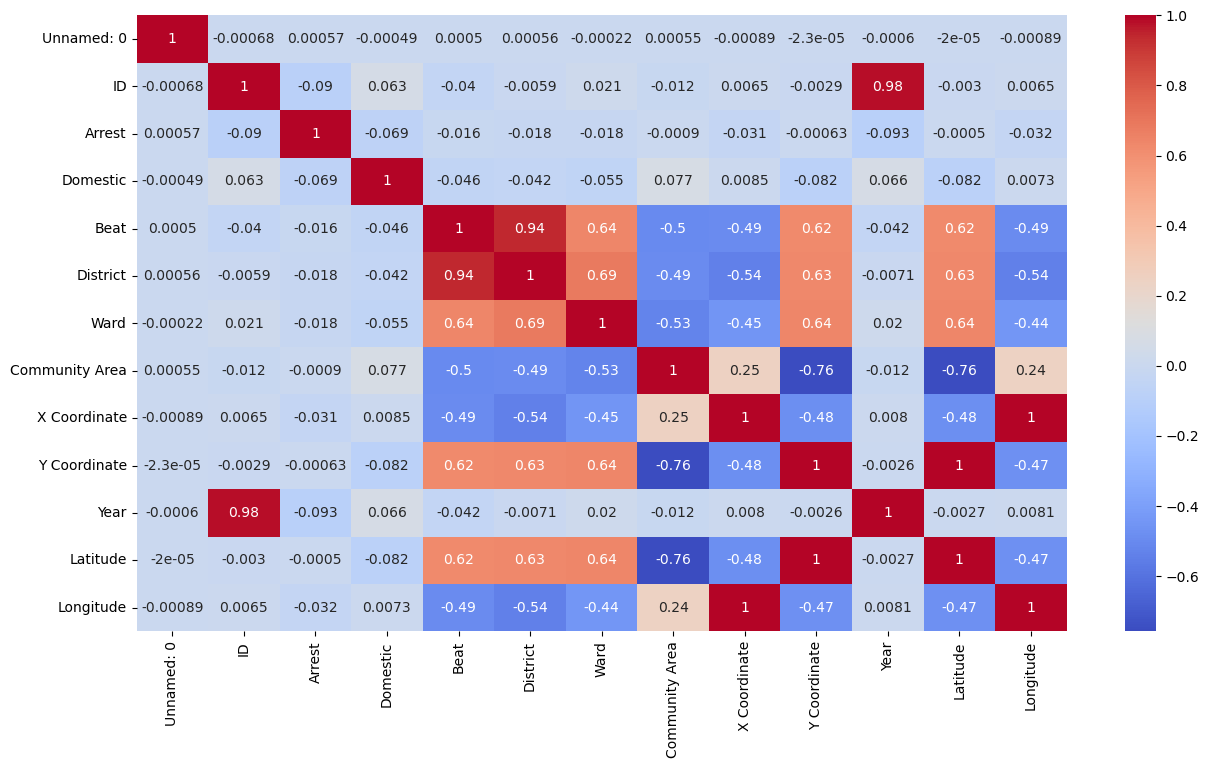

In [11]:
#Visualizing the correlation between the features
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [12]:
#Checking for the number of unique observations in the dataset
data.nunique()

Unnamed: 0              2278726
ID                      2278726
Case Number             2278678
Date                    1343546
Block                     54347
IUCR                        392
Primary Type                 35
Description                 515
Location Description        198
Arrest                        2
Domestic                      2
Beat                        304
District                     23
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              73335
Y Coordinate             122589
Year                         22
Updated On                 4461
Latitude                 544919
Longitude                544655
Location                 545376
dtype: int64

In [13]:
#Checking to see the feature names
data.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

## DATA CLEANING

In [14]:
#Here the data will be cleaned of outliers, null values, renaming, creating new features etc.

In [15]:
#checking for the percentage of missing values in each feature
nullVals = data.isnull().sum()
for val in nullVals:
    print((val/data.shape[0])*100)

0.0
0.0
4.388417036537083e-05
0.0
0.0
0.0
0.0
0.0
0.12625475814117187
0.0
0.0
0.0
0.00052661004438445
8.105186845632165
8.086404420715786
0.0
1.0525618262134193
1.0525618262134193
0.0
0.0
1.0525618262134193
1.0525618262134193
1.0525618262134193


In [ ]:
# features with missing values less than 5% will be droped. 
# However, because the missing data from "Ward" , and community area are significant and more than 5%, 
# the data have been stored in (nullWardVals) variable. 
# We may need them to improve the performance of the model that we will build.

In [16]:
nullWardVals = data[data['Ward'].isna()]
nullXYCordVals =data[data['X Coordinate'].isna()]

In [17]:
nullWardVals.isna().sum()

Unnamed: 0                   0
ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description         1
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                    184695
Community Area          183900
FBI Code                     0
X Coordinate              2756
Y Coordinate              2756
Year                         0
Updated On                   0
Latitude                  2756
Longitude                 2756
Location                  2756
dtype: int64

In [18]:
nullXYCordVals.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1008
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                     2756
Community Area           2721
FBI Code                    0
X Coordinate            23985
Y Coordinate            23985
Year                        0
Updated On                  0
Latitude                23985
Longitude               23985
Location                23985
dtype: int64

In [19]:
data.dropna(inplace=True)
data.isna().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [20]:
data['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT',
       'ROBBERY', 'NARCOTICS', 'MOTOR VEHICLE THEFT', 'BATTERY',
       'OTHER OFFENSE', 'PROSTITUTION', 'DECEPTIVE PRACTICE', 'THEFT',
       'INTIMIDATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL TRESPASS', 'STALKING', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'CRIM SEXUAL ASSAULT', 'HOMICIDE',
       'LIQUOR LAW VIOLATION', 'SEX OFFENSE', 'CRIMINAL SEXUAL ASSAULT',
       'KIDNAPPING', 'ARSON', 'GAMBLING',
       'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY',
       'NON - CRIMINAL', 'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL', 'OBSCENITY', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [21]:
#Correcting some observations that were wrongly inputed as NON - CRIMINAL instead of NON-CRIMINAL
pd.DataFrame(data.loc[data['Primary Type'] == 'NON - CRIMINAL'])

Unnamed: 0        ID Case Number                    Date  \
14971         14971  10072565    HY261001  05/14/2015 10:30:00 AM   
238906       238906   9665407    HX315271  05/25/2014 09:30:00 AM   
599201       599201  10128364    HY316525  06/26/2015 10:45:00 AM   
620756       620756  10412587    HZ149851  02/13/2016 12:11:00 AM   
867154       867154   9968609    HY157483  02/20/2015 08:00:00 AM   
1027246     1027246  10109156    HY297801  06/12/2015 09:00:00 AM   
1061141     1061141   9406560    HW549849  11/27/2013 10:20:00 AM   
1080275     1080275  10344075    HY535016  12/12/2015 08:50:00 PM   
1205251     1205251  10064717    HY253344  05/08/2015 01:15:00 PM   
1213095     1213095  10233370    HY421530  09/13/2015 10:45:00 AM   
1857167     1857167  10280097    HY468448  10/19/2015 06:50:00 PM   
2000226     2000226   9774371    HX424417  09/11/2014 02:55:00 PM   

                         Block  IUCR    Primary Type        Description  \
14971         006XX N WELLS ST  5114  NON - CRIMINAL  FOID - REVOCATION   
238906        001XX W 109TH ST  5114  NON - CRIMINAL  FOID - REVOCATION   
599201    035XX S MICHIGAN AVE  5114  NON - CRIMINAL  FOID - REVOCATION   
620756      031XX S HALSTED ST  5114  NON - CRIMINAL  FOID - REVOCATION   
867154         063XX W 64TH PL  5114  NON - CRIMINAL  FOID - REVOCATION   
1027246       053XX S NEVA AVE  5114  NON - CRIMINAL  FOID - REVOCATION   
1061141       022XX E 103RD ST  5114  NON - CRIMINAL  FOID - REVOCATION   
1080275        025XX W 80TH PL  5114  NON - CRIMINAL  FOID - REVOCATION   
1205251  051XX S WENTWORTH AVE  5114  NON - CRIMINAL  FOID - REVOCATION   
1213095     010XX S MENARD AVE  5114  NON - CRIMINAL  FOID - REVOCATION   
1857167      033XX W OGDEN AVE  5114  NON - CRIMINAL  FOID - REVOCATION   
2000226       007XX E 111TH ST  5114  NON - CRIMINAL  FOID - REVOCATION   

                    Location Description  Arrest  ...  Ward  Community Area  \
14971                             STREET   False  ...  42.0             8.0   
238906                         RESIDENCE   False  ...  34.0            49.0   
599201   POLICE FACILITY/VEH PARKING LOT   False  ...   3.0            35.0   
620756   POLICE FACILITY/VEH PARKING LOT    True  ...  11.0            60.0   
867154                         APARTMENT   False  ...  13.0            64.0   
1027246                        RESIDENCE   False  ...  23.0            56.0   
1061141  POLICE FACILITY/VEH PARKING LOT   False  ...  10.0            51.0   
1080275           VEHICLE NON-COMMERCIAL   False  ...  18.0            70.0   
1205251  POLICE FACILITY/VEH PARKING LOT   False  ...   3.0            37.0   
1213095                        RESIDENCE    True  ...  29.0            25.0   
1857167  POLICE FACILITY/VEH PARKING LOT   False  ...  24.0            29.0   
2000226  POLICE FACILITY/VEH PARKING LOT   False  ...   9.0            50.0   

         FBI Code  X Coordinate  Y Coordinate  Year              Updated On  \
14971          26     1174623.0     1904537.0  2015  02/10/2018 03:50:01 PM   
238906         26     1177310.0     1832676.0  2014  02/10/2018 03:50:01 PM   
599201         26     1177772.0     1881665.0  2015  02/10/2018 03:50:01 PM   
620756         26     1171479.0     1884120.0  2016  02/10/2018 03:50:01 PM   
867154         26     1135244.0     1861076.0  2015  02/10/2018 03:50:01 PM   
1027246        26     1129584.0     1868411.0  2015  02/10/2018 03:50:01 PM   
1061141        26     1192874.0     1837123.0  2013  02/10/2018 03:50:01 PM   
1080275        26     1160683.0     1851174.0  2015  02/10/2018 03:50:01 PM   
1205251        26     1175826.0     1871120.0  2015  02/10/2018 03:50:01 PM   
1213095        26     1137869.0     1895239.0  2015  02/10/2018 03:50:01 PM   
1857167        26     1154489.0     1891024.0  2015  02/10/2018 03:50:01 PM   
2000226        26     1183356.0     1831503.0  2014  02/10/2018 03:50:01 PM   

          Latitude  Longitude                       Location  
14971    41.8934

In [22]:
data['Primary Type'] = data['Primary Type'].replace(['NON - CRIMINAL'],'NON-CRIMINAL')

In [23]:
pd.DataFrame(data.loc[data['Primary Type'] == 'CRIM SEXUAL ASSAULT'])

Unnamed: 0        ID Case Number                    Date  \
164             164   2691244    HJ310810  04/19/2003 03:30:00 PM   
708             708   4937082    HM538784  08/13/2006 11:45:00 PM   
918             918   9301484    HW444561  08/19/2013 07:00:00 PM   
927             927   7109293    HR515924  08/29/2009 03:30:00 AM   
2151           2151   8165877    HT395194  07/12/2011 03:35:00 PM   
...             ...       ...         ...                     ...   
2277266     2277266   2295883    HH579319  08/14/2002 07:30:00 AM   
2277613     2277613   6129521    HP222181  03/12/2008 04:30:00 PM   
2277791     2277791   7200607    HR614010  10/28/2009 11:00:00 PM   
2278182     2278182  11860557    JC472519  09/01/2019 12:00:00 PM   
2278471     2278471  10961036    JA283198  05/26/2017 09:00:00 PM   

                        Block  IUCR         Primary Type  \
164        064XX S JUSTINE ST  0281  CRIM SEXUAL ASSAULT   
708      039XX W JACKSON BLVD  0263  CRIM SEXUAL ASSAULT   
918      059XX S CARPENTER ST  0281  CRIM SEXUAL ASSAULT   
927       068XX S PRAIRIE AVE  0263  CRIM SEXUAL ASSAULT   
2151      088XX S INDIANA AVE  0281  CRIM SEXUAL ASSAULT   
...                       ...   ...                  ...   
2277266   060XX S ASHLAND AVE  0263  CRIM SEXUAL ASSAULT   
2277613      118XX S LOWE AVE  0261  CRIM SEXUAL ASSAULT   
2277791  015XX E MARQUETTE RD  0281  CRIM SEXUAL ASSAULT   
2278182     069XX S PEORIA ST  0281  CRIM SEXUAL ASSAULT   
2278471    021XX N OAKLEY AVE  0281  CRIM SEXUAL ASSAULT   

                         Description               Location Description  \
164                   NON-AGGRAVATED                          RESIDENCE   
708      AGGRAVATED: KNIFE/CUT INSTR                              ALLEY   
918                   NON-AGGRAVATED                          RESIDENCE   
927      AGGRAVATED: KNIFE/CUT INSTR                          APARTMENT   
2151                  NON-AGGRAVATED            SCHOOL, PUBLIC, GROUNDS   
...                              ...                                ...   
2277266  AGGRAVATED: KNIFE/CUT INSTR  CHURCH/SYNAGOGUE/PLACE OF WORSHIP   
2277613          AGGRAVATED: HANDGUN                          RESIDENCE   
2277791               NON-AGGRAVATED                          APARTMENT   
2278182               NON-AGGRAVATED                          RESIDENCE   
2278471               NON-AGGRAVATED                          APARTMENT   

         Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  \
164       False  ...  17.0            67.0        02     1167112.0   
708       False  ...  28.0            26.0        02     1150250.0   
918       False  ...  16.0            68.0        02     1170328.0   
927       False  ...  20.0            69.0        02     1179218.0   
2151      False  ...   6.0            44.0        02     1179136.0   
...         ...  ...   ...             ...       ...           ...   
2277266   False  ...  15.0            67.0        02     1166704.0   
2277613   False  ...  34.0            53.0        02     1174109.0   
2277791   False  ...   5.0            42.0        02     1187555.0   
2278182   False  ...   6.0            68.0        02     1171504.0   
2278471   False  ...  32.0            22.0        02     1160558.0   

         Y Coordinate  Year              Updated On   Latitude  Longitude  \
164         1862060.0  2003  02/28/2018 03:56:25 PM  41.777049 -87.662920   
708         1898399.0  2006  02/28/2018 03:56:25 PM  41.877112 -87.723791   
918         1865462.0  2013  02/10/2018 03:50:01 PM  41.786315 -87.651032   
927         1859802.0  2009  02/28/2018 03:56:25 PM  41.770585 -87.618609   
2151        1846522.0  2011  02/10/2018 03:50:01 PM  41.734145 -87.619314   
...               ...   ...                     ...        ...        ...   
2277266     1864729.0  2002  02/28/2018 03:56:25 PM  41.784381 -87.664340   
2277613     1826346.0  2008  02/10/2018 03:50:01 PM  41.678892 -87.638327   
2277791     1861540.0  2

In [24]:
data['Primary Type'] = data['Primary Type'].replace(['CRIM SEXUAL ASSAULT'],'CRIMINAL SEXUAL ASSAULT')

In [25]:
len(data['Primary Type'].unique())

33

### Creating additonal columns of Day, Period and Month from the Date column which will be named crimeDay, crimePeriod and crimeMonth respectively

In [26]:
from dateutil.parser import parse
from datetime import datetime
tCol = data.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening'
    elif row[1] =='PM' and int(row[0][11:13])>=6:
        period = 'Night'
    else:
        period = 'Unknown'

    dayList.append(day)
    monthList.append(month)
    periodList.append(period)

print(len(dayList), len(monthList), len(periodList))

data['crimeMonth'] = monthList
data['crimeDay'] = dayList
data['crimePeriod']= periodList
data.head()

2070581 2070581 2070581


Unnamed: 0        ID Case Number                    Date  \
0           0   6407111    HP485721  07/26/2008 02:30:00 PM   
1           1  11398199    JB372830  07/31/2018 10:57:00 AM   
2           2   5488785    HN308568  04/27/2007 10:30:00 AM   
3           3  11389116    JB361368  07/23/2018 08:55:00 AM   
4           4  12420431    JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR       Primary Type               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                     Location Description  Arrest  ...  X Coordinate  \
0                                  STREET   False  ...     1196638.0   
1                               POOL ROOM    True  ...     1184499.0   
2                               RESIDENCE    True  ...     1146911.0   
3            NURSING HOME/RETIREMENT HOME   False  ...     1148388.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False  ...     1165430.0   

   Y Coordinate  Year              Updated On   Latitude  Longitude  \
0     1848800.0  2008  02/28/2018 03:56:25 PM  41.739980 -87.555120   
1     1843935.0  2018  08/07/2018 04:02:59 PM  41.726922 -87.599747   
2     1941022.0  2007  02/28/2018 03:56:25 PM  41.994138 -87.734959   
3     1899882.0  2018  07/30/2018 03:52:24 PM  41.881217 -87.730590   
4     1897441.0  2021  07/18/2021 04:56:02 PM  41.874174 -87.668082   

                        Location  crimeMonth  crimeDay crimePeriod  
0  (41.739979622, -87.555120042)         Jul      Sat    Afternoon  
1  (41.726922145, -87.599746995)         Jul      Tue      Morning  
2  (41.994137622, -87.734959049)         Apr      Fri      Morning  
3  (41.881217483, -87.730589961)         Jul      Mon      Morning  
4  (41.874173691, -87.668082118)         Jul      Sun      Morning  

[5 rows x 26 columns]

In [28]:
# Because of the time it took to unpack the date column using the code above, the dataset will be saved as crimedf
data.to_csv ('C:/Users/ACER/Documents/WorkSpace/crimedf.csv', index = False, header=True)

In [29]:
crimedf = pd.read_csv('C:/Users/ACER/Documents/WorkSpace/crimedf.csv')

In [30]:
crimedf.shape

(2070581, 26)

In [31]:
crimedf.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location', 'crimeMonth', 'crimeDay', 'crimePeriod'],
      dtype='object')

In [32]:
print('Current rows:', crimedf.shape[0])
crimedf.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Rows after deduplication:', crimedf.shape[0])

Current rows: 2070581
Rows after deduplication: 2070581


## Assessing some of the geographycal features 

In [33]:
#X-coord and Y-coord
crimedf[['X Coordinate', 'Y Coordinate']]

X Coordinate  Y Coordinate
0           1196638.0     1848800.0
1           1184499.0     1843935.0
2           1146911.0     1941022.0
3           1148388.0     1899882.0
4           1165430.0     1897441.0
...               ...           ...
2070576     1138111.0     1922705.0
2070577     1175423.0     1904617.0
2070578     1181989.0     1878827.0
2070579     1174469.0     1904732.0
2070580     1158782.0     1910845.0

[2070581 rows x 2 columns]

In [34]:
crimedf['Location']

0          (41.739979622, -87.555120042)
1          (41.726922145, -87.599746995)
2          (41.994137622, -87.734959049)
3          (41.881217483, -87.730589961)
4          (41.874173691, -87.668082118)
                       ...              
2070576    (41.944038314, -87.767774454)
2070577    (41.893646656, -87.631177143)
2070578     (41.82272748, -87.607863136)
2070579    (41.893983593, -87.634677382)
2070580     (41.91109424, -87.692122762)
Name: Location, Length: 2070581, dtype: object

In [35]:
crimedf['Location Description']

0                                          STREET
1                                       POOL ROOM
2                                       RESIDENCE
3                    NURSING HOME/RETIREMENT HOME
4          PARKING LOT / GARAGE (NON RESIDENTIAL)
                            ...                  
2070576                    VEHICLE NON-COMMERCIAL
2070577                         CONVENIENCE STORE
2070578                                 APARTMENT
2070579            PARKING LOT/GARAGE(NON.RESID.)
2070580                                    STREET
Name: Location Description, Length: 2070581, dtype: object

In [36]:
len(crimedf['Location Description'].unique())

198

There are 198 locations that crimes were reported from according to the data. 

In [37]:
crimedf['Community Area'].unique().max()

77.0

There are 77 community areas in the city of Chicago.

In [38]:
crimedf[['Latitude', 'Longitude']]

Latitude  Longitude
0        41.739980 -87.555120
1        41.726922 -87.599747
2        41.994138 -87.734959
3        41.881217 -87.730590
4        41.874174 -87.668082
...            ...        ...
2070576  41.944038 -87.767774
2070577  41.893647 -87.631177
2070578  41.822727 -87.607863
2070579  41.893984 -87.634677
2070580  41.911094 -87.692123

[2070581 rows x 2 columns]

In [39]:
crimedf.Ward.unique().max()

50.0

There are 50 wards in the dataset

In [40]:
#checking the Primary Type column
#there is need to rename some columns to remove the space and clarify meaning  
crimedf.rename(columns ={'Primary Type': 'CrimeType', 'Case Number': 'caseNumber', 'FBI Code': 'FBICode', 'X Coordinate':'XCoordinate', 'Y Coordinate':'YCoordinate', 'Location Description':'locationDescription'}, inplace = True)
crimedf.head()

Unnamed: 0        ID caseNumber                    Date  \
0           0   6407111   HP485721  07/26/2008 02:30:00 PM   
1           1  11398199   JB372830  07/31/2018 10:57:00 AM   
2           2   5488785   HN308568  04/27/2007 10:30:00 AM   
3           3  11389116   JB361368  07/23/2018 08:55:00 AM   
4           4  12420431   JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR          CrimeType               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                      locationDescription  Arrest  ...  XCoordinate  \
0                                  STREET   False  ...    1196638.0   
1                               POOL ROOM    True  ...    1184499.0   
2                               RESIDENCE    True  ...    1146911.0   
3            NURSING HOME/RETIREMENT HOME   False  ...    1148388.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False  ...    1165430.0   

   YCoordinate  Year              Updated On   Latitude  Longitude  \
0    1848800.0  2008  02/28/2018 03:56:25 PM  41.739980 -87.555120   
1    1843935.0  2018  08/07/2018 04:02:59 PM  41.726922 -87.599747   
2    1941022.0  2007  02/28/2018 03:56:25 PM  41.994138 -87.734959   
3    1899882.0  2018  07/30/2018 03:52:24 PM  41.881217 -87.730590   
4    1897441.0  2021  07/18/2021 04:56:02 PM  41.874174 -87.668082   

                        Location  crimeMonth  crimeDay crimePeriod  
0  (41.739979622, -87.555120042)         Jul      Sat    Afternoon  
1  (41.726922145, -87.599746995)         Jul      Tue      Morning  
2  (41.994137622, -87.734959049)         Apr      Fri      Morning  
3  (41.881217483, -87.730589961)         Jul      Mon      Morning  
4  (41.874173691, -87.668082118)         Jul      Sun      Morning  

[5 rows x 26 columns]

In [41]:
len(crimedf.CrimeType.unique())

33

There are 33 crime types that have been recorded. This was after we corrected 2 of the error

In [42]:
len(crimedf.Description.unique())

511

In [43]:
crimedf.CrimeType.value_counts()

THEFT                                436851
BATTERY                              381760
CRIMINAL DAMAGE                      237244
NARCOTICS                            199506
ASSAULT                              135223
OTHER OFFENSE                        128772
BURGLARY                             114981
MOTOR VEHICLE THEFT                   95269
DECEPTIVE PRACTICE                    87658
ROBBERY                               78447
CRIMINAL TRESPASS                     57954
WEAPONS VIOLATION                     28470
PROSTITUTION                          18260
OFFENSE INVOLVING CHILDREN            14430
PUBLIC PEACE VIOLATION                14396
CRIMINAL SEXUAL ASSAULT                8711
SEX OFFENSE                            7534
INTERFERENCE WITH PUBLIC OFFICER       5298
GAMBLING                               3991
LIQUOR LAW VIOLATION                   3839
ARSON                                  3500
HOMICIDE                               3484
KIDNAPPING                      

In [44]:
crimedf.CrimeType.value_counts(ascending=False, normalize=True)*100

THEFT                                21.097991
BATTERY                              18.437337
CRIMINAL DAMAGE                      11.457847
NARCOTICS                             9.635267
ASSAULT                               6.530679
OTHER OFFENSE                         6.219124
BURGLARY                              5.553079
MOTOR VEHICLE THEFT                   4.601076
DECEPTIVE PRACTICE                    4.233498
ROBBERY                               3.788647
CRIMINAL TRESPASS                     2.798925
WEAPONS VIOLATION                     1.374976
PROSTITUTION                          0.881878
OFFENSE INVOLVING CHILDREN            0.696906
PUBLIC PEACE VIOLATION                0.695264
CRIMINAL SEXUAL ASSAULT               0.420703
SEX OFFENSE                           0.363859
INTERFERENCE WITH PUBLIC OFFICER      0.255870
GAMBLING                              0.192748
LIQUOR LAW VIOLATION                  0.185407
ARSON                                 0.169035
HOMICIDE     

In [39]:
#21% of reported criminal activites in Chicago area are Theft, 18% Battery and 11% criminal damage

### EXPLORATORY DATA ANALYSIS

In [45]:
#Checking the crimeType column
pd.DataFrame(crimedf['CrimeType'].sort_values())

CrimeType
537141               ARSON
942376               ARSON
1116851              ARSON
1982584              ARSON
1442973              ARSON
...                    ...
1117355  WEAPONS VIOLATION
359720   WEAPONS VIOLATION
939992   WEAPONS VIOLATION
614361   WEAPONS VIOLATION
1795210  WEAPONS VIOLATION

[2070581 rows x 1 columns]

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


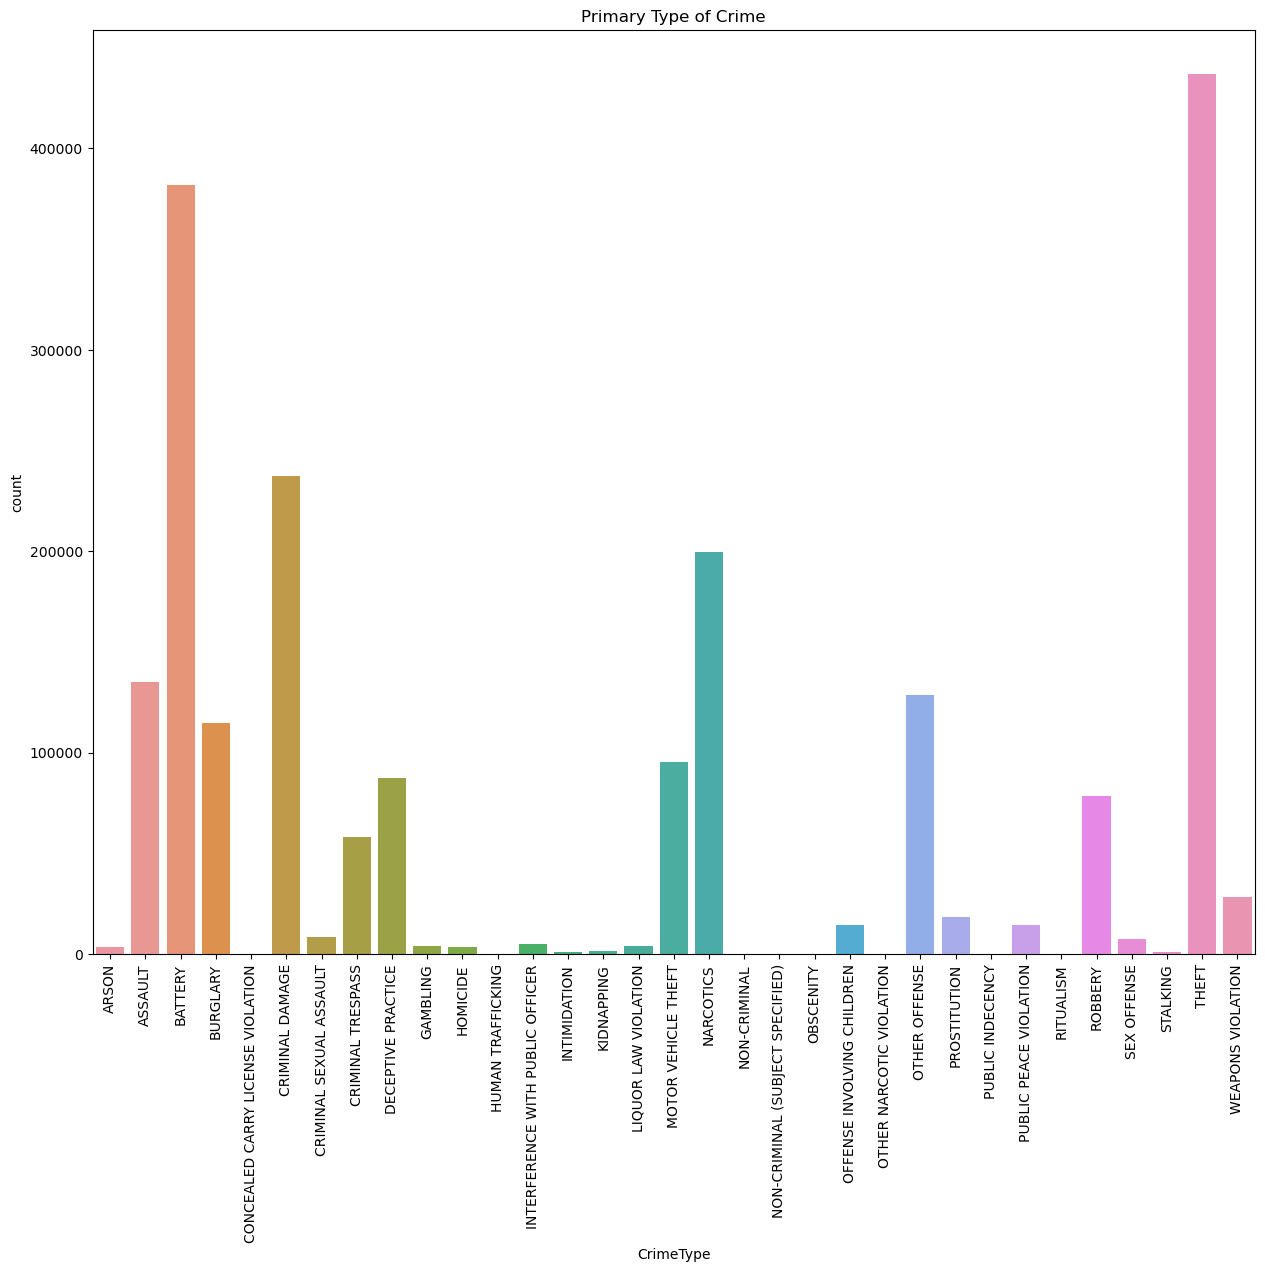

In [46]:
plt.figure(figsize=(15,12))
sns.countplot(crimedf.CrimeType.sort_values())
plt.title('Primary Type of Crime')
plt.xticks(rotation=90)
plt.show()

# Ward accounts for the most crime

#### Theft and Battery are crimes with the most occurrence in Chicago.

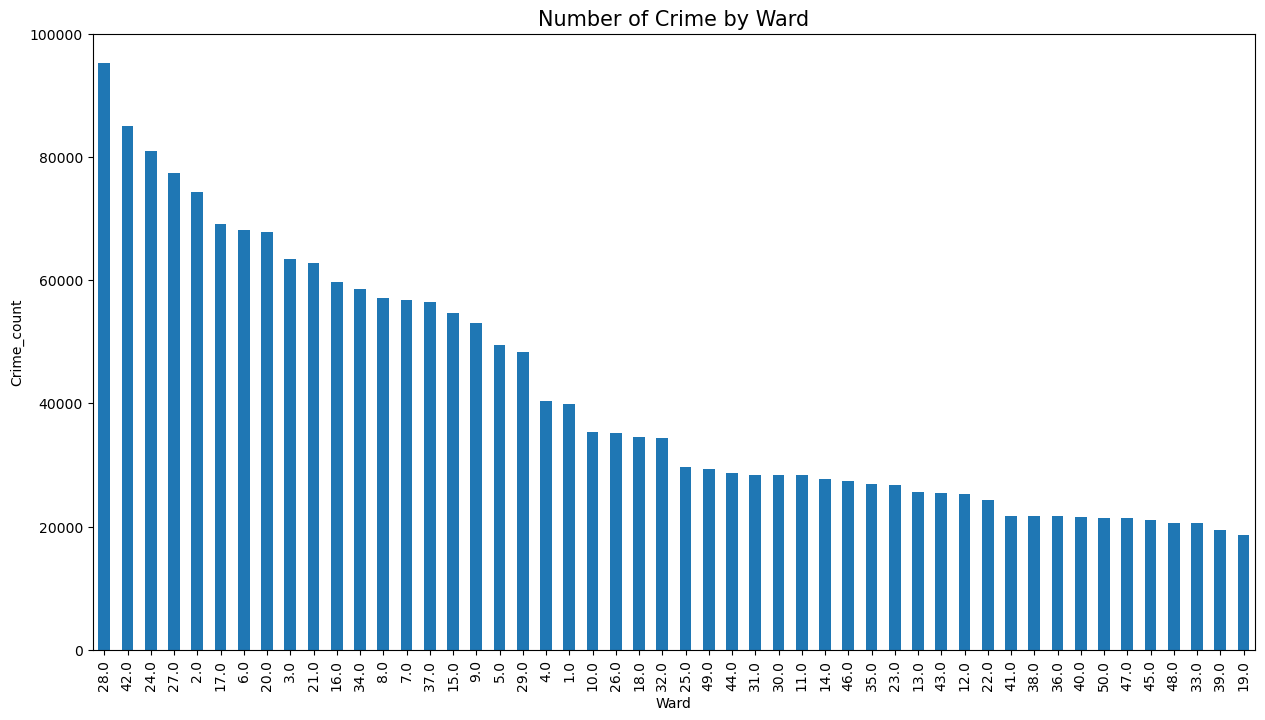

In [47]:
plt.figure(figsize=(15,8))
crimedf['Ward'].value_counts().plot(kind='bar')
plt.title('Number of Crime by Ward', fontsize = 15)
plt.xlabel("Ward")
plt.ylabel("Crime_count")
plt.show()

#There are 50 different wards in the city of Chicago
#The most crime occured at ward 28 with ward 19 having the least crime rate.

### Crime Types recorded in each ward

In [48]:
pd.DataFrame(crimedf[['CrimeType', 'Ward']].value_counts()[0:30])

0
CrimeType Ward       
THEFT     42.0  42826
NARCOTICS 28.0  23933
THEFT     2.0   23151
BATTERY   28.0  19688
NARCOTICS 24.0  18284
THEFT     27.0  17549
BATTERY   24.0  17273
          17.0  16514
          20.0  15624
THEFT     32.0  14157
NARCOTICS 27.0  14008
BATTERY   6.0   13995
          16.0  13733
THEFT     1.0   13501
BATTERY   3.0   13474
          27.0  13138
          7.0   12842
          34.0  12723
          8.0   12221
          21.0  12210
THEFT     21.0  12101
BATTERY   15.0  12067
          9.0   11933
          37.0  11499
THEFT     6.0   11261
          43.0  11209
          28.0  10912
          44.0  10833
BATTERY   2.0   10784
          29.0  10679

In [54]:
pd.DataFrame(crimedf['Ward'].value_counts())

Ward
28.0  95263
42.0  85049
24.0  81049
27.0  77374
2.0   74357
17.0  69061
6.0   68188
20.0  67850
3.0   63465
21.0  62740
16.0  59720
34.0  58494
8.0   57049
7.0   56796
37.0  56482
15.0  54658
9.0   53086
5.0   49558
29.0  48378
4.0   40339
1.0   39860
10.0  35327
26.0  35271
18.0  34498
32.0  34317
25.0  29751
49.0  29352
44.0  28677
31.0  28442
30.0  28350
11.0  28315
14.0  27783
46.0  27457
35.0  26914
23.0  26711
13.0  25649
43.0  25498
12.0  25207
22.0  24234
41.0  21787
38.0  21775
36.0  21744
40.0  21631
50.0  21368
47.0  21346
45.0  21145
48.0  20592
33.0  20589
39.0  19448
19.0  18587

In [55]:
pd.DataFrame(crimedf[['CrimeType', 'Ward', 'crimePeriod']].value_counts()[0:30])

0
CrimeType Ward crimePeriod       
THEFT     42.0 Night        14202
               Morning      11368
NARCOTICS 28.0 Night        11020
THEFT     42.0 Afternoon    10259
          2.0  Morning       8264
NARCOTICS 24.0 Night         8220
BATTERY   28.0 Morning       7755
THEFT     2.0  Night         7552
BATTERY   28.0 Night         7095
THEFT     42.0 Evening       6997
NARCOTICS 27.0 Night         6563
BATTERY   24.0 Morning       6559
               Night         6540
THEFT     27.0 Night         6503
               Morning       6431
BATTERY   17.0 Morning       6247
               Night         6232
NARCOTICS 28.0 Morning       6188
BATTERY   20.0 Morning       5842
               Night         5791
          6.0  Morning       5588
THEFT     32.0 Night         5467
BATTERY   27.0 Morning       5380
THEFT     1.0  Night         5331
NARCOTICS 24.0 Morning       5283
BATTERY   16.0 Night         5203
          7.0  Morning       5082
          16.0 Morning       5058
          3.0  Morning       4960
               Night         4952

In [ ]:
# 42826 THEFT cases were reported at ward 42 and reported mostly at Night. This represents the highest crime cases recorded in a single ward. 
# Theft is also the most reported crimes across different wards. 23151 crime cases reported in Ward 2 are THEFT 
# NARCOTICS and BATTERY are the most reported crimes in ward 28 with 23933 and 19688 cases respectively. 
# NARCOTICS related crimes are mostly reported in wards; 28, 27, 24
# Ward 28 accounts for the most crime in Chicago

In [56]:
pd.DataFrame(crimedf['Block'].value_counts())
print(len(crimedf.Block.unique()))

33841


There are 33841 blocks in chicago

### What the top 30 blocks where the highest crime occured

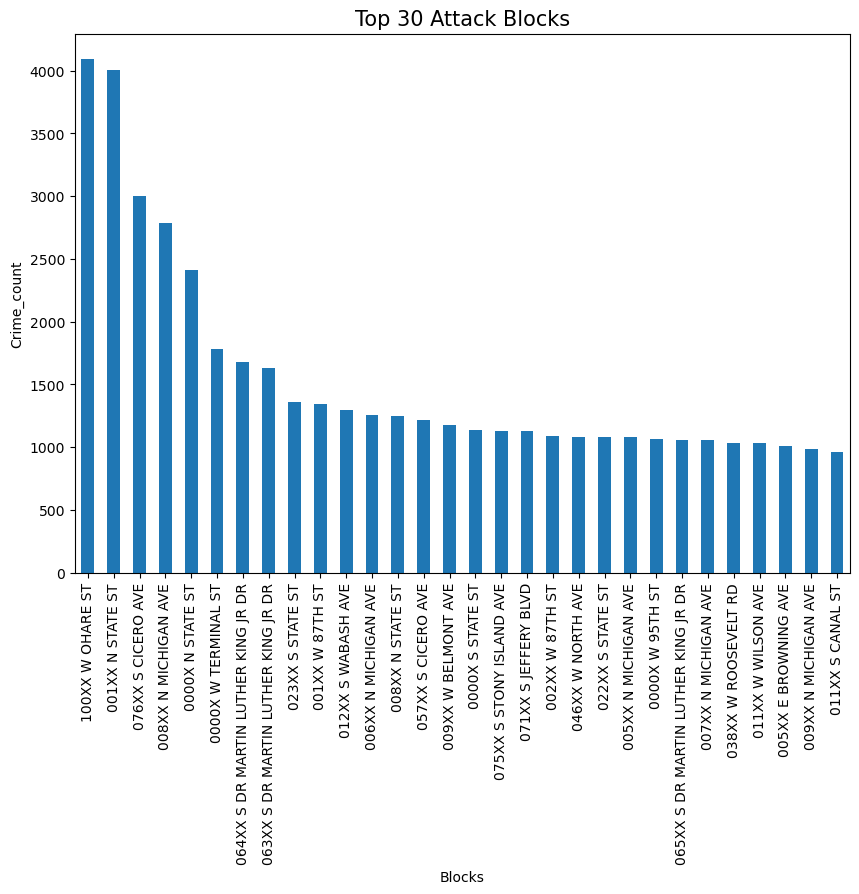

In [57]:
plt.figure(figsize=(10,7))
crimedf['Block'].value_counts()[0:30].plot(kind='bar')
plt.title('Top 30 Attack Blocks', fontsize = 15)
plt.xlabel("Blocks")
plt.ylabel("Crime_count")
plt.show()

In [58]:
crimedf['Block'].value_counts()[0:30]

100XX W OHARE ST                       4090
001XX N STATE ST                       4006
076XX S CICERO AVE                     2998
008XX N MICHIGAN AVE                   2785
0000X N STATE ST                       2412
0000X W TERMINAL ST                    1780
064XX S DR MARTIN LUTHER KING JR DR    1680
063XX S DR MARTIN LUTHER KING JR DR    1635
023XX S STATE ST                       1358
001XX W 87TH ST                        1341
012XX S WABASH AVE                     1297
006XX N MICHIGAN AVE                   1260
008XX N STATE ST                       1251
057XX S CICERO AVE                     1216
009XX W BELMONT AVE                    1175
0000X S STATE ST                       1135
075XX S STONY ISLAND AVE               1133
071XX S JEFFERY BLVD                   1132
002XX W 87TH ST                        1089
046XX W NORTH AVE                      1084
022XX S STATE ST                       1084
005XX N MICHIGAN AVE                   1079
0000X W 95TH ST                 

In [59]:
pd.DataFrame(crimedf[['Block', 'crimePeriod']].value_counts())[0:30]

0
Block                               crimePeriod      
100XX W OHARE ST                    Morning      1824
001XX N STATE ST                    Night        1318
076XX S CICERO AVE                  Night        1146
001XX N STATE ST                    Afternoon    1108
100XX W OHARE ST                    Night        1085
008XX N MICHIGAN AVE                Night         990
001XX N STATE ST                    Evening       889
0000X W TERMINAL ST                 Morning       852
008XX N MICHIGAN AVE                Afternoon     821
076XX S CICERO AVE                  Afternoon     812
0000X N STATE ST                    Afternoon     802
100XX W OHARE ST                    Afternoon     725
076XX S CICERO AVE                  Evening       696
001XX N STATE ST                    Morning       691
033XX W FILLMORE ST                 Morning       691
0000X N STATE ST                    Night         671
008XX N MICHIGAN AVE                Evening       648
0000X W DIVISION ST                 Morning       642
064XX S DR MARTIN LUTHER KING JR DR Night         635
                                    Morning       620
063XX S DR MARTIN LUTHER KING JR DR Night         602
                                    Morning       601
009XX W BELMONT AVE                 Morning       590
023XX S STATE ST                    Night         567
0000X N STATE ST                    Evening       548
008XX N STATE ST                    Night         538
001XX W 87TH ST                     Night         506
023XX S STATE ST                    Morning       496
0000X W HUBBARD ST                  Morning       492
022XX S STATE ST                    Night         481

There are a total of 33,841 blocks in Chicago, 
the visualization above shows the top 30 where most crimes have been reported with 100XX W OHARE ST,001XX N STATE ST,076XX S CICERO AVE, 008XX N MICHIGAN AVE and 0000X W STATE ST been the most susceptible

The most crime were reported at 1000XX W OHARE ST and 001XX N STATE ST blocks with over 4000 records
most crimes recorded in 100XX W OHARE ST block, occured in the morning and a substantial number were recorded at night
most crimes were recorded at night in 001XX N STATE ST and 076XX S CICERO AVE blocks 

## Which day accounts for the most crime?

In [60]:
pd.DataFrame(crimedf['crimeDay'].value_counts())

crimeDay
Fri     311383
Wed     297801
Sat     296893
Tue     295674
Thu     294212
Mon     292254
Sun     282364

In [61]:
pd.DataFrame(crimedf[['crimeDay', 'crimePeriod']].value_counts())

0
crimeDay crimePeriod        
Fri      Night        121001
Sat      Morning      116428
Sun      Morning      114926
Wed      Night        113369
Tue      Night        112619
Sat      Night        111398
Thu      Night        111342
Fri      Morning      109886
Mon      Night        109612
         Morning      106825
Thu      Morning      105378
Wed      Morning      105268
Tue      Morning      104610
Sun      Night        102706
Fri      Afternoon     48279
Wed      Afternoon     47790
Tue      Afternoon     47107
Thu      Afternoon     46767
Mon      Afternoon     45345
Sat      Afternoon     40869
Sun      Afternoon     37698
Fri      Evening       32217
Wed      Evening       31374
Tue      Evening       31338
Thu      Evening       30725
Mon      Evening       30472
Sat      Evening       28198
Sun      Evening       27034

<AxesSubplot:xlabel='crimeDay', ylabel='count'>

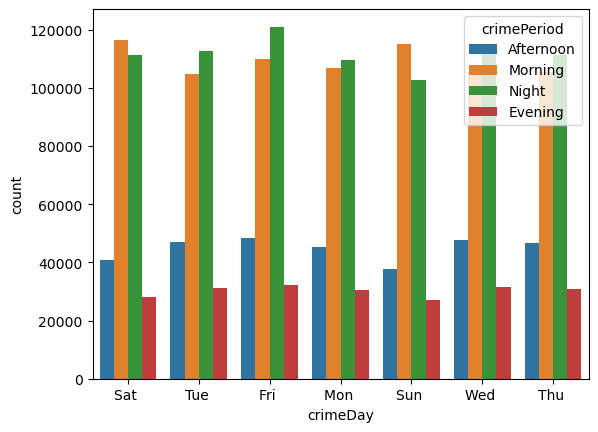

In [62]:
sns.countplot(data=crimedf, x='crimeDay', hue='crimePeriod')

Text(0, 0.5, 'number of crime')

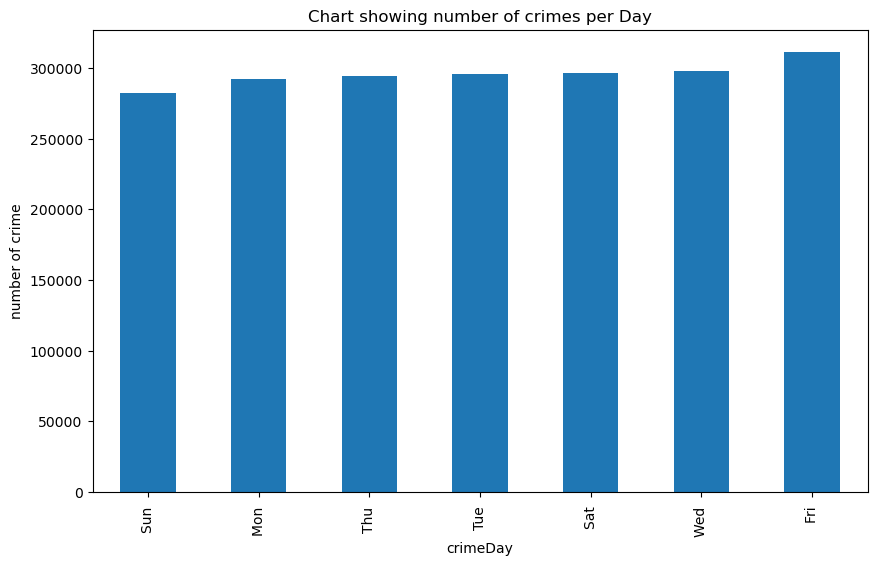

In [64]:
crimedf['crimeDay'].value_counts(ascending=True).plot(kind='bar', figsize=(10,6))
plt.title('Chart showing number of crimes per Day')
plt.xlabel("crimeDay")
plt.ylabel("number of crime")

Most crimes were reported on Fridays with over 300,000 records, however, there is no considerable difference between the number of crimes reported on a particular day.
However, more crime rate have been reported at Night on Fridays

## Which Month accounts for the most crime?

In [65]:
crimedf.columns

Index(['Unnamed: 0', 'ID', 'caseNumber', 'Date', 'Block', 'IUCR', 'CrimeType',
       'Description', 'locationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBICode', 'XCoordinate',
       'YCoordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'crimeMonth', 'crimeDay', 'crimePeriod'],
      dtype='object')

In [66]:
pd.DataFrame(crimedf.crimeMonth.value_counts())

crimeMonth
Jul      198320
Aug      191098
May      190591
Jun      190568
Oct      180506
Sep      179078
Apr      166273
Mar      164240
Nov      162565
Jan      155411
Dec      154559
Feb      137372

In [67]:
pd.DataFrame(crimedf[['crimeMonth', 'crimePeriod']].value_counts())

0
crimeMonth crimePeriod       
Jul        Night        76169
           Morning      74721
Aug        Night        73753
Jun        Night        72835
May        Night        71959
Aug        Morning      71150
Jun        Morning      71117
May        Morning      70360
Oct        Night        68405
Sep        Night        67841
           Morning      66414
Oct        Morning      65578
Apr        Night        63115
Mar        Night        61398
Nov        Night        60918
Apr        Morning      60048
Nov        Morning      59876
Mar        Morning      59672
Jan        Morning      57659
Dec        Night        57634
Jan        Night        57412
Dec        Morning      56422
Feb        Night        50608
           Morning      50304
May        Afternoon    28922
Jul        Afternoon    28075
Oct        Afternoon    27946
Jun        Afternoon    27732
Aug        Afternoon    27175
Sep        Afternoon    26259
Mar        Afternoon    26159
Apr        Afternoon    25701
Nov        Afternoon    25119
Jan        Afternoon    24383
Dec        Afternoon    24233
Feb        Afternoon    22151
Jul        Evening      19355
May        Evening      19350
Aug        Evening      19020
Jun        Evening      18884
Oct        Evening      18577
Sep        Evening      18564
Apr        Evening      17409
Mar        Evening      17011
Nov        Evening      16652
Dec        Evening      16270
Jan        Evening      15957
Feb        Evening      14309

<AxesSubplot:xlabel='crimeMonth', ylabel='count'>

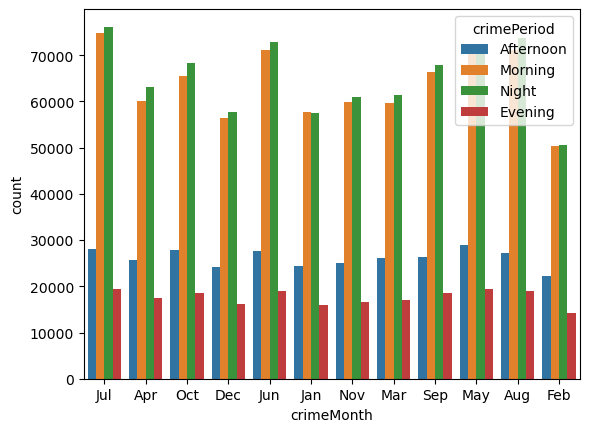

In [68]:
sns.countplot(data=crimedf, x='crimeMonth', hue='crimePeriod')


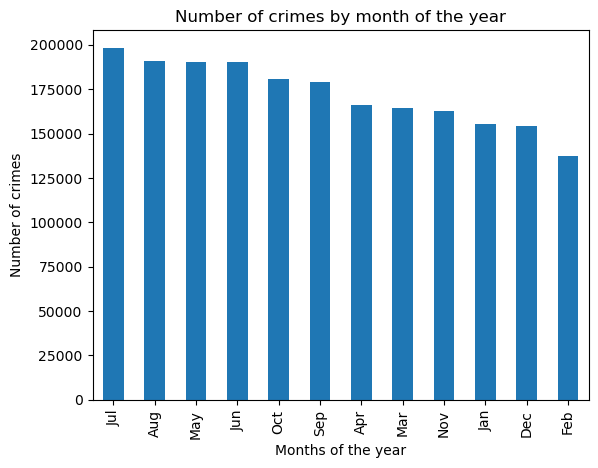

In [69]:
crimedf.groupby([crimedf.crimeMonth]).size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of crimes')
plt.xlabel('Months of the year')
plt.title('Number of crimes by month of the year')
plt.show()

The month of July accounted for the most crimes records when compared to other months with about 200,000 cases. Most of the cases were reported at Night and morning periods

However, there is no considerable difference in crime rate in May, June,july and August. 
Crime rate starts to decline from September. with February being the month with the lowest crime rate

## Which Period accounts for the most crime?

In [70]:
pd.DataFrame(crimedf.crimePeriod.value_counts())

crimePeriod
Night           782047
Morning         763321
Afternoon       313855
Evening         211358

In [71]:
pd.DataFrame(crimedf.crimePeriod.value_counts(normalize=True)*100)

crimePeriod
Night        37.769447
Morning      36.865063
Afternoon    15.157823
Evening      10.207666

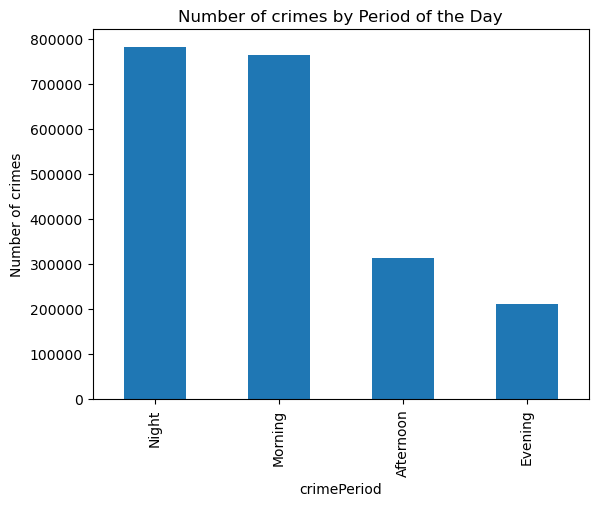

In [72]:
crimedf.groupby([crimedf.crimePeriod]).size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of crimes')
plt.xlabel('crimePeriod')
plt.title('Number of crimes by Period of the Day')
plt.show()

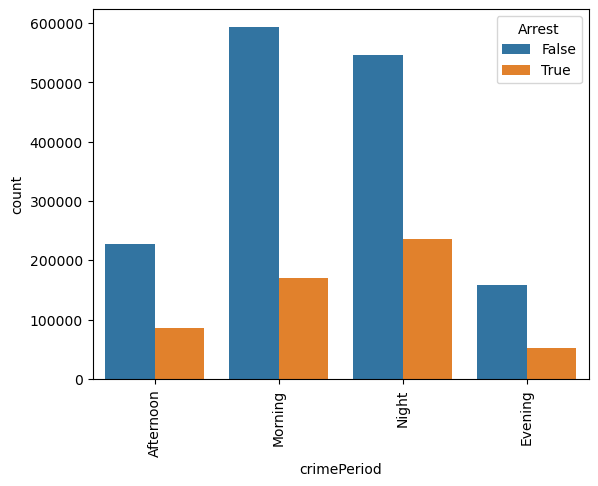

In [73]:
#plt.figure(figsize=(15,10))
sns.countplot(data=crimedf, x=crimedf.crimePeriod, hue='Arrest')
plt.xticks(rotation=90)
plt.show()

Crime rate is highest at Night and in the morning. Evenings has the lowest crime occurence.

37.8 of the reported crimes in Chicago happens at Night and about the same percentage happens in the morning

More Arrests were made at Night with over 200,000 and in the Morning with above 150,000 arrests. 

However, these periods also accounts for the most false arrests.

## Which Year accounts for the most crime?

In [74]:
pd.DataFrame(crimedf.Year.value_counts())

Year
2003  141488
2004  140152
2005  134629
2006  133955
2007  130308
2008  125713
2009  116308
2010  110900
2011  105436
2002  103271
2012  100524
2013   91534
2014   82094
2016   80235
2017   79317
2018   79265
2015   77264
2019   77205
2020   62277
2021   60855
2022   36671
2001    1180

In [75]:
pd.DataFrame(crimedf[['Year', 'crimePeriod']].value_counts())

0
Year crimePeriod       
2003 Night        55125
2004 Night        54576
2005 Night        52317
2006 Night        51647
2003 Morning      50543
...                 ...
2022 Evening       3875
2001 Morning        641
     Night          358
     Afternoon      106
     Evening         75

[88 rows x 1 columns]

In [76]:
pd.DataFrame(crimedf.Year.value_counts(normalize=True)*100)

Year
2003  6.833251
2004  6.768728
2005  6.501991
2006  6.469440
2007  6.293306
2008  6.071388
2009  5.617167
2010  5.355985
2011  5.092097
2002  4.987537
2012  4.854869
2013  4.420692
2014  3.964781
2016  3.874999
2017  3.830664
2018  3.828153
2015  3.731513
2019  3.728664
2020  3.007707
2021  2.939030
2022  1.771049
2001  0.056989

<AxesSubplot:xlabel='crimeMonth', ylabel='count'>

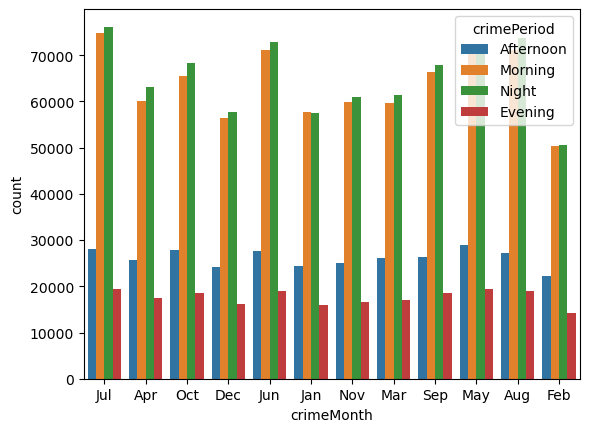

In [77]:
sns.countplot(data=crimedf,x='crimeMonth', hue='crimePeriod')

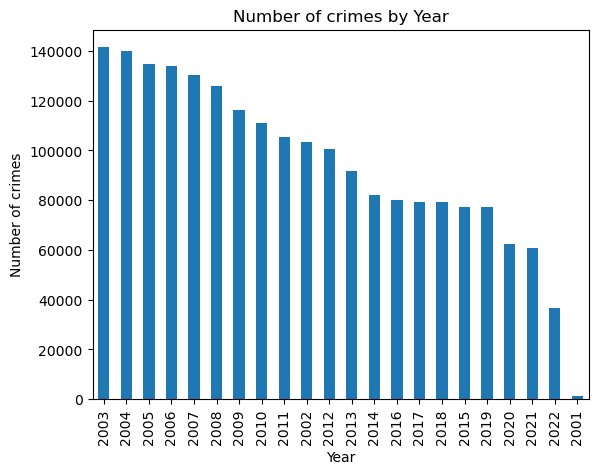

In [78]:
crimedf.groupby([crimedf.Year]).size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of crimes')
plt.xlabel('Year')
plt.title('Number of crimes by Year')
plt.show()

6.8% of the reported crime in chicago till date happened in 2003, which was up from a paltry 0.05% in 2001. 

Crime rate have experienced consistent decline since 2003

Most crime cases were reported during the night period in 2003, 2004,2005, 2006. Substantial amount of crime also occured during the morning periods

## What are the Top Ten Years with the most crimes?

In [79]:
pd.DataFrame(crimedf.Year.value_counts())[0:10]

Year
2003  141488
2004  140152
2005  134629
2006  133955
2007  130308
2008  125713
2009  116308
2010  110900
2011  105436
2002  103271

Text(0.5, 0, 'Year')

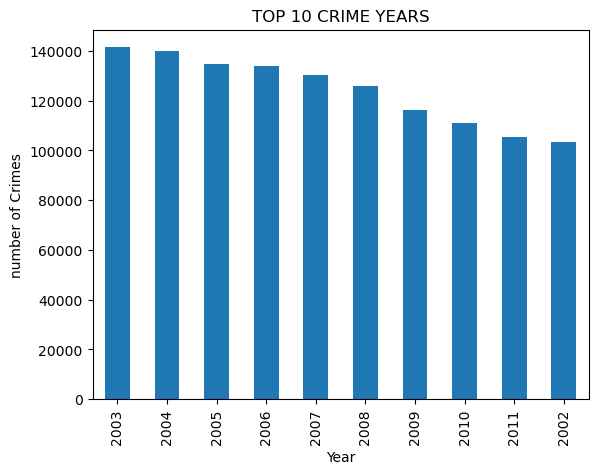

In [80]:
#plt.figure(figsize=(12,10))
crimedf['Year'].value_counts()[0:10].plot(kind='bar')
plt.title('TOP 10 CRIME YEARS')
plt.ylabel("number of Crimes")
plt.xlabel("Year")

# Checking Arrests in relation to ward

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Arrest', ylabel='count'>

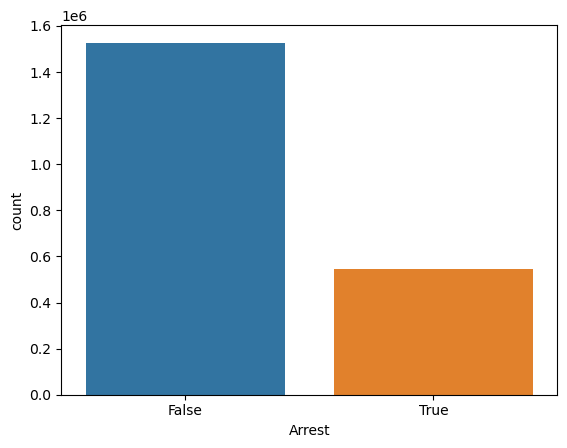

In [81]:
sns.countplot(crimedf.Arrest)

In [82]:
pd.DataFrame(crimedf[['CrimeType', 'Ward', 'Arrest']].value_counts())

0
CrimeType                Ward Arrest       
THEFT                    42.0 False   35540
NARCOTICS                28.0 True    23888
THEFT                    2.0  False   20180
NARCOTICS                24.0 True    18190
THEFT                    27.0 False   16019
...                                     ...
OBSCENITY                49.0 False       1
                         48.0 False       1
                         46.0 False       1
PUBLIC INDECENCY         35.0 True        1
OTHER NARCOTIC VIOLATION 32.0 True        1

[2648 rows x 1 columns]

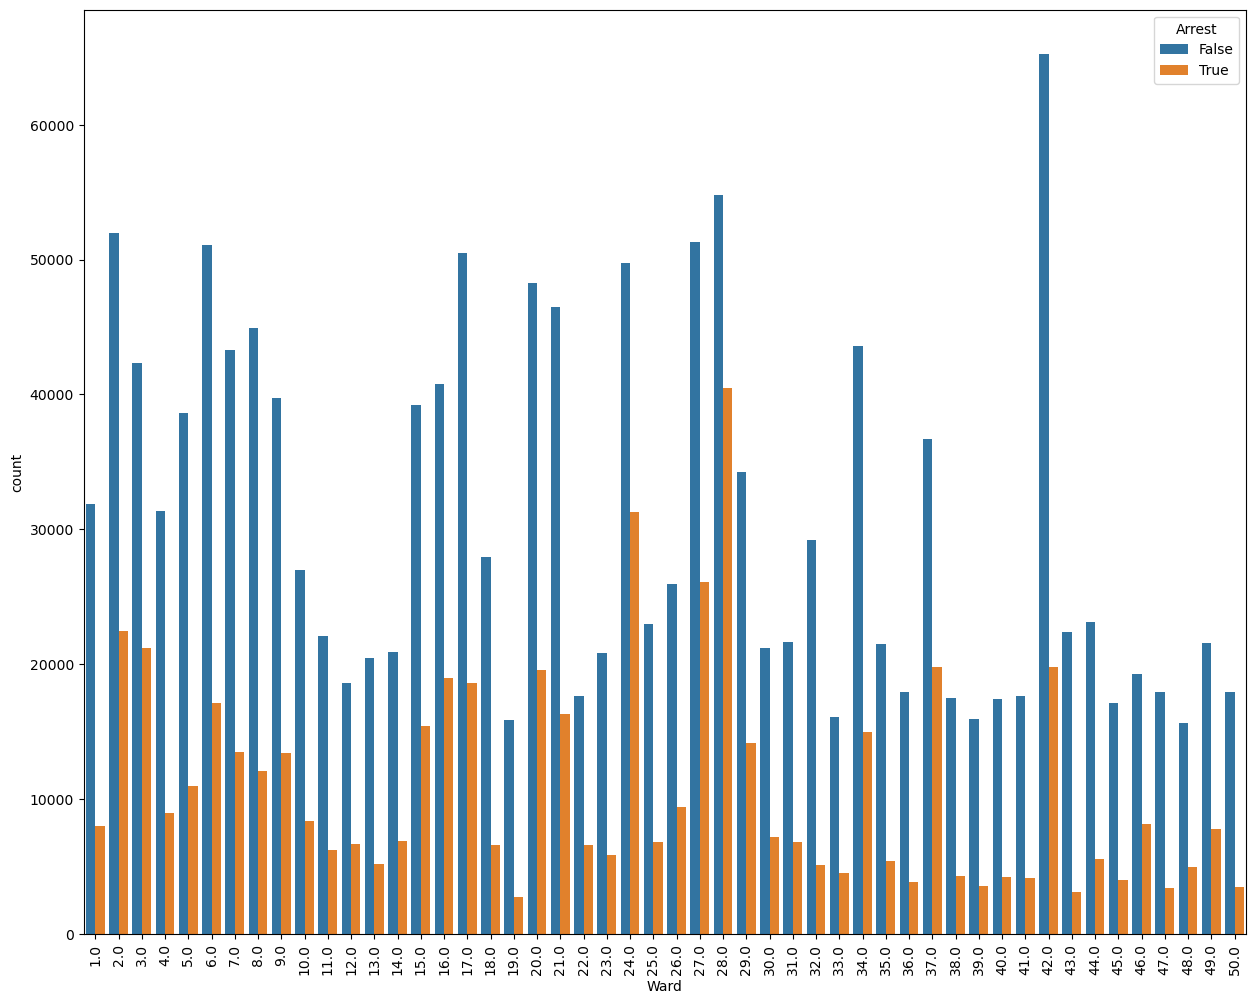

In [84]:
plt.figure(figsize=(15,12))
sns.countplot(data=crimedf, x=crimedf.Ward, hue='Arrest')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# There has not been much Arrest successes in Criminal damage, Theft, burglary,Assualt,robbery, Battery and other crimes
# However, more Arrests has been recorded in the Weapon Violation, Nacortics, criminal trespass crimes 

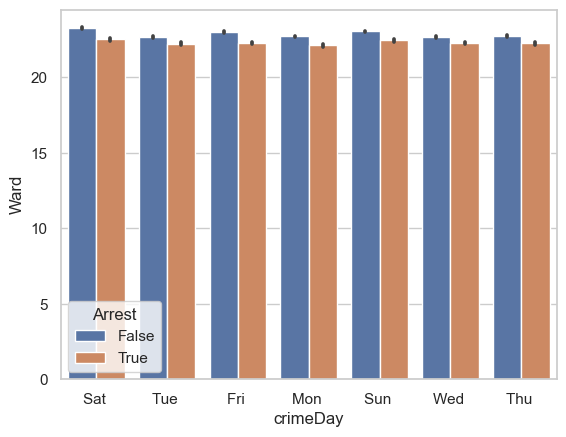

In [85]:
sns.set_theme(style='whitegrid')
#plt.figure(figsize=(12,15))
x = crimedf.crimeDay
y = crimedf.Ward
ax=sns.barplot(data=crimedf, x=x, y=y, hue='Arrest')

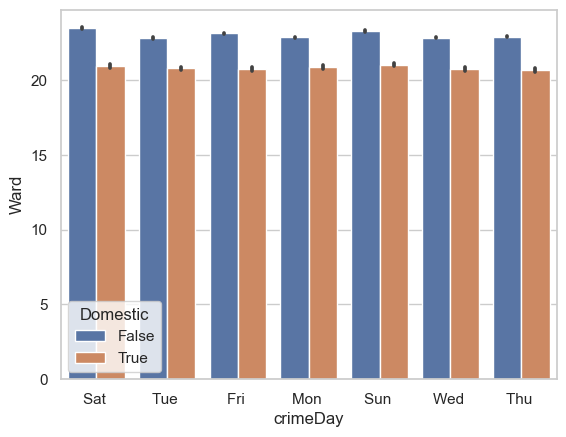

In [86]:
x = crimedf.crimeDay
y = crimedf.Ward
ax=sns.barplot(data=crimedf, x=x, y=y, hue='Domestic')

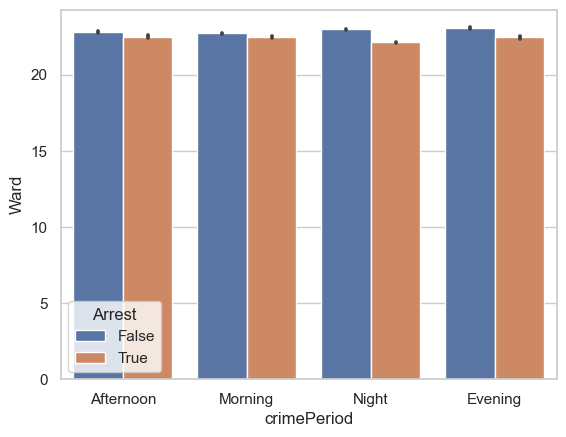

In [87]:
x = crimedf.crimePeriod
y = crimedf.Ward
ax=sns.barplot(data=crimedf, x=x, y=y, hue='Arrest')

In [62]:
# Again there are almost the same number of crimes with and without arrests. This can mean two things, Eigther it was a false report 
# or the criminals evaded arrest

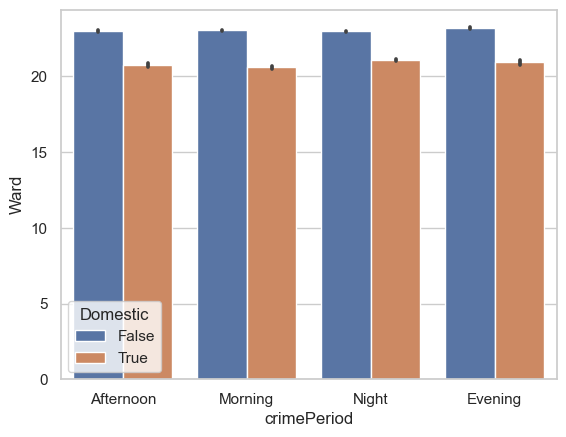

In [88]:
x = crimedf.crimePeriod
y = crimedf.Ward
ax=sns.barplot(data=crimedf, x=x, y=y, hue='Domestic')

In [76]:
#No arrest was made for most of the crimes reported on all the days of the week

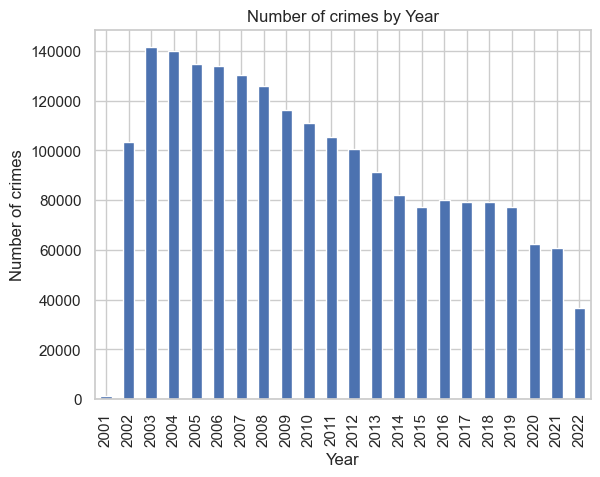

In [89]:
crimedf.groupby([crimedf.Year]).size().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes by Year')
plt.show()

In [90]:
crimedf.columns

Index(['Unnamed: 0', 'ID', 'caseNumber', 'Date', 'Block', 'IUCR', 'CrimeType',
       'Description', 'locationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBICode', 'XCoordinate',
       'YCoordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'crimeMonth', 'crimeDay', 'crimePeriod'],
      dtype='object')

## FINDINGS

More crimes were recorded in the year 2003 and 2004. Crime rate rose from almost 1,180 in 2001 to 103,271 crimes in 2002 and experienced it peak in 2003 at 141,488 crimes. But has consistently declined since 2003. But has consistently declined since then.

There are a total of 33,841 blocks in Chicago, the visualization above shows the top 30 where most crimes have been reported with 100XX W OHARE ST,001XX N STATE ST,076XX S CICERO AVE, 008XX N MICHIGAN

21% of the crimes reported were Theft while Battery and Criminal damage accounts for 18.4% and 11.5% respectively.

The most prevalent forms of crime is Simple,  Domestic Battery Simple, To Vehicle   and To Property which accounts for a total 38.77% of all forms of crime reported.

Street, Residence, Apartment and Sidewalk are the most targeted for crimes in Chicago and this accounts for 63.47% of the crime target reported.

Wards 28, 42, 24 and 27 witnessed the most crimes.

Streets are the most targeted in location description for crimes with the following streets being the most susceptible to crime 063XX S DR MARTIN LUTHER KING JR DR, 045XX W MADISON ST, 043XX W VAN BUREN ST, 026XX W MADISON ST, 064XX S DR MARTIN LUTHER KING JR DR, 079XX S HALSTED ST, 065XX S DR MARTIN LUTHER KING JR DR, 079XX S COTTAGE GROVE AVE, 062XX S ASHLAND AVE, 029XX W MADISON ST, and 030XX W MADISON ST amongst others.

The day of the week has no effect on the frequency in which crimes occur as the percentage of the different days were almost the same except for Friday which had a slight higher percentage.

Crime is not peculiar to any month, although February and December have the least number of crimes but this is just slightly different from other months

Crime rate is highest at Night and in the Morning. Evenings has the lowest crime occurrence. 37.8% of the reported crimes in Chicago were reported at Night and about the same percentage reported in the Morning

13.81% of the crime cases reported were domestic violence.

26.54% of arrest were made of all crimes reported during the period

Sexual Assault and Arson occurs more in the Morning period



## RECOMMENDATIONS

The Chicago law enforcement has done well over the years. However, there is room for improvement which is why this project is important. Below are some recommendations to be consider in order to improve response to criminal activities.

> More crime cases have been reported for Theft, Battery, Criminal damage and Narcotics, the PD should use the different media platforms to give proper orientation to discourage people going into crimes especially those mentioned here. Some form of legistlation to increase the punishment of the common crime activities in area will go a long way to deter people from criminal activities.

> The Chicago PD hasn't made remarkable progress in capturing those involved in these crimes Arson, Battery, Burglary, Criminal Damage, Criminal Sexual Assault, Human Trafficking, Kidnapping, Motor Vehicle Theft, Offense Involving Children, Ritualism, Robbery and Theft. Installation of more hidden cameras could help identify perpetrators of especially street crimes

> Security officers should also focus attention on morning periods during the weekends as the rate of crime is high for that period

> A closer watch and heavy security presence should be given to the following streets since more crime cases were reported from there 063XX S DR MARTIN LUTHER KING JR DR,045XX W MADISON ST,043XX W VAN BUREN ST,026XX W MADISON ST,064XX S DR MARTIN LUTHER KING JR DR,079XX S HALSTED ST,065XX S DR MARTIN LUTHER KING JR DR,079XX S COTTAGE GROVE AVE,062XX S ASHLAND AVE,029XX W MADISON ST,029XX S STATE ST,040XX W MADISON ST,039XX W GRENSHAW ST,038XX W ROOSEVELT RD and 030XX W MADISON ST

> More facilities should be deployed to the blocks with more susceptibility of crime such as 100XX W OHARE ST which ranked first when compared to other blocks.

> Proper sensitization of the residence to report crime as they happen and where they happen should be encouraged.

> The PD needs to device strategies to improve  arrest in the following's crimes: Arson, Battery, Burglary, Criminal Damage, Criminal Sexual Assault, Human Trafficking, Kidnapping, Motor Vehicle Theft, Offense Involving Children, Ritualism, Robbery and Theft.

> Also, the PD needs to ensure accurate documentation and entries to guide against missing data that couldn’t be analyzed. This will help to lower the risk of crime happening.

## Data Preprocessing for Modelling

In [ ]:
# Now that we are inching closer to building a model, there is need to Convert Categorical features to numerical

In [91]:
crimedf.head()

Unnamed: 0        ID caseNumber                    Date  \
0           0   6407111   HP485721  07/26/2008 02:30:00 PM   
1           1  11398199   JB372830  07/31/2018 10:57:00 AM   
2           2   5488785   HN308568  04/27/2007 10:30:00 AM   
3           3  11389116   JB361368  07/23/2018 08:55:00 AM   
4           4  12420431   JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR          CrimeType               Description  \
0  085XX S MUSKEGON AVE  1320    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE  143C  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE  0610           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE  0560            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST  051A            ASSAULT      AGGRAVATED - HANDGUN   

                      locationDescription  Arrest  ...  XCoordinate  \
0                                  STREET   False  ...    1196638.0   
1                               POOL ROOM    True  ...    1184499.0   
2                               RESIDENCE    True  ...    1146911.0   
3            NURSING HOME/RETIREMENT HOME   False  ...    1148388.0   
4  PARKING LOT / GARAGE (NON RESIDENTIAL)   False  ...    1165430.0   

   YCoordinate  Year              Updated On   Latitude  Longitude  \
0    1848800.0  2008  02/28/2018 03:56:25 PM  41.739980 -87.555120   
1    1843935.0  2018  08/07/2018 04:02:59 PM  41.726922 -87.599747   
2    1941022.0  2007  02/28/2018 03:56:25 PM  41.994138 -87.734959   
3    1899882.0  2018  07/30/2018 03:52:24 PM  41.881217 -87.730590   
4    1897441.0  2021  07/18/2021 04:56:02 PM  41.874174 -87.668082   

                        Location  crimeMonth  crimeDay crimePeriod  
0  (41.739979622, -87.555120042)         Jul      Sat    Afternoon  
1  (41.726922145, -87.599746995)         Jul      Tue      Morning  
2  (41.994137622, -87.734959049)         Apr      Fri      Morning  
3  (41.881217483, -87.730589961)         Jul      Mon      Morning  
4  (41.874173691, -87.668082118)         Jul      Sun      Morning  

[5 rows x 26 columns]

In [92]:
crimedf['CrimeType']

0            CRIMINAL DAMAGE
1          WEAPONS VIOLATION
2                   BURGLARY
3                    ASSAULT
4                    ASSAULT
                 ...        
2070576                THEFT
2070577              ASSAULT
2070578              ASSAULT
2070579    CRIMINAL TRESPASS
2070580            NARCOTICS
Name: CrimeType, Length: 2070581, dtype: object

In [93]:
# Converting categorical to numerical
crimedf.crimePeriod.unique()

crimedf['CrimeType'] = crimedf['CrimeType'].astype('category')
crimedf['CrimeTypeCat'] = crimedf['CrimeType'].cat.codes

crimedf['Description'] = crimedf['Description'].astype('category')
crimedf['DescriptionCat'] = crimedf['Description'].cat.codes

crimedf['locationDescription'] = crimedf['locationDescription'].astype('category')
crimedf['locDescriptionCat'] = crimedf['locationDescription'].cat.codes

crimedf['crimeMonth'] = crimedf['crimeMonth'].astype('category')
crimedf['crimeMonthCat'] = crimedf['crimeMonth'].cat.codes

crimedf['crimeDay'] = crimedf['crimeDay'].astype('category')
crimedf['crimeDayCat'] = crimedf['crimeDay'].cat.codes

crimedf['crimePeriod'] = crimedf['crimePeriod'].astype('category')
crimedf['crimePeriodCat'] = crimedf['crimePeriod'].cat.codes

crimedf['FBICode'] = crimedf['FBICode'].astype('category')
crimedf['FBICodeCat'] = crimedf['FBICode'].cat.codes

crimedf['IUCR'] = crimedf['IUCR'].astype('category')
crimedf['IUCR'] = crimedf['IUCR'].cat.codes


crimedf.Arrest = crimedf.Arrest.astype(int)
crimedf.Domestic = crimedf.Domestic.astype(int)

print(crimedf.CrimeType.unique())
print(crimedf.CrimeTypeCat.unique())


print(crimedf.crimePeriod.unique())
print(crimedf.crimePeriodCat.unique())


print(crimedf.crimeMonth.unique())
print(crimedf.crimeMonthCat.unique())


print(crimedf.crimeDay.unique())
print(crimedf.crimeDayCat.unique())


print(crimedf.crimeMonthCat.unique())
print(crimedf.crimeMonthCat.unique())


print(crimedf.FBICode.unique())
print(crimedf.FBICodeCat.unique())

['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT', 'ROBBERY', ..., 'OTHER NARCOTIC VIOLATION', 'HUMAN TRAFFICKING', 'OBSCENITY', 'RITUALISM', 'NON-CRIMINAL (SUBJECT SPECIFIED)']
Length: 33
Categories (33, object): ['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY', ..., 'SEX OFFENSE', 'STALKING', 'THEFT', 'WEAPONS VIOLATION']
[ 5 32  3  1 28 17 16  2 23 24  8 31 13 12  7 30 21 26  6 10 15 29 14  0
  9  4 25 18 22 11 20 27 19]
['Afternoon', 'Morning', 'Night', 'Evening']
Categories (4, object): ['Afternoon', 'Evening', 'Morning', 'Night']
[0 2 3 1]
['Jul', 'Apr', 'Oct', 'Dec', 'Jun', ..., 'Mar', 'Sep', 'May', 'Aug', 'Feb']
Length: 12
Categories (12, object): ['Apr', 'Aug', 'Dec', 'Feb', ..., 'May', 'Nov', 'Oct', 'Sep']
[ 5  0 10  2  6  4  9  7 11  8  1  3]
['Sat ', 'Tue ', 'Fri ', 'Mon ', 'Sun ', 'Wed ', 'Thu ']
Categories (7, object): ['Fri ', 'Mon ', 'Sat ', 'Sun ', 'Thu ', 'Tue ', 'Wed ']
[2 5 0 1 3 6 4]
[ 5  0 10  2  6  4  9  7 11  8  1  3]
[ 5  0 10  2  6  4  9  7 11  8  1  3]

In [94]:
crimedf['IUCR'] = crimedf['IUCR'].astype('category')
crimedf['IUCR'] = crimedf['IUCR'].cat.codes

In [95]:
crimedf.head()

Unnamed: 0        ID caseNumber                    Date  \
0           0   6407111   HP485721  07/26/2008 02:30:00 PM   
1           1  11398199   JB372830  07/31/2018 10:57:00 AM   
2           2   5488785   HN308568  04/27/2007 10:30:00 AM   
3           3  11389116   JB361368  07/23/2018 08:55:00 AM   
4           4  12420431   JE297624  07/11/2021 06:40:00 AM   

                  Block  IUCR          CrimeType               Description  \
0  085XX S MUSKEGON AVE   156    CRIMINAL DAMAGE                TO VEHICLE   
1     092XX S ELLIS AVE   174  WEAPONS VIOLATION  UNLAWFUL POSS AMMUNITION   
2     062XX N TRIPP AVE    83           BURGLARY            FORCIBLE ENTRY   
3    0000X N KEELER AVE    77            ASSAULT                    SIMPLE   
4   016XX W HARRISON ST    63            ASSAULT      AGGRAVATED - HANDGUN   

                      locationDescription  Arrest  ...  crimeMonth  crimeDay  \
0                                  STREET       0  ...         Jul      Sat    
1                               POOL ROOM       1  ...         Jul      Tue    
2                               RESIDENCE       1  ...         Apr      Fri    
3            NURSING HOME/RETIREMENT HOME       0  ...         Jul      Mon    
4  PARKING LOT / GARAGE (NON RESIDENTIAL)       0  ...         Jul      Sun    

   crimePeriod  CrimeTypeCat  DescriptionCat locDescriptionCat  crimeMonthCat  \
0    Afternoon             5             460               171              5   
1      Morning            32             466               139              5   
2      Morning             3             215               145              0   
3      Morning             1             419               125              5   
4      Morning             1              25               134              5   

   crimeDayCat  crimePeriodCat FBICodeCat  
0            2               0         16  
1            5               2         17  
2            0               2          6  
3            1               2          9  
4            3               2          4  

[5 rows x 33 columns]

In [96]:
crimedf.columns

Index(['Unnamed: 0', 'ID', 'caseNumber', 'Date', 'Block', 'IUCR', 'CrimeType',
       'Description', 'locationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBICode', 'XCoordinate',
       'YCoordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'crimeMonth', 'crimeDay', 'crimePeriod', 'CrimeTypeCat',
       'DescriptionCat', 'locDescriptionCat', 'crimeMonthCat', 'crimeDayCat',
       'crimePeriodCat', 'FBICodeCat'],
      dtype='object')

In [ ]:
# The converted features has been stored in crimedf for future reference

In [97]:
#crimedfAlpha = crimedf.loc[:, ['Unnamed: 0', 'Date', 'ID', 'CrimeType', 'FBICode', 'Description', 'caseNumber', 'Block', 'month', 'day', 'period']]
crimedfAlpha = crimedf.iloc[:, [0,1,2,3,4, 6,7,8,19,23,24,25]]
crimedfAlpha

Unnamed: 0        ID caseNumber                    Date  \
0                 0   6407111   HP485721  07/26/2008 02:30:00 PM   
1                 1  11398199   JB372830  07/31/2018 10:57:00 AM   
2                 2   5488785   HN308568  04/27/2007 10:30:00 AM   
3                 3  11389116   JB361368  07/23/2018 08:55:00 AM   
4                 4  12420431   JE297624  07/11/2021 06:40:00 AM   
...             ...       ...        ...                     ...   
2070576     2278720   6643262   HP714246  12/03/2008 05:30:00 AM   
2070577     2278721  10716043   HZ474139  10/14/2016 02:35:00 PM   
2070578     2278723   4737434   HM342705  05/10/2006 07:49:00 PM   
2070579     2278724  11122832   JA476827  10/18/2017 10:30:00 PM   
2070580     2278725   3409804   HK420105  06/09/2004 08:19:28 PM   

                        Block          CrimeType  \
0        085XX S MUSKEGON AVE    CRIMINAL DAMAGE   
1           092XX S ELLIS AVE  WEAPONS VIOLATION   
2           062XX N TRIPP AVE           BURGLARY   
3          0000X N KEELER AVE            ASSAULT   
4         016XX W HARRISON ST            ASSAULT   
...                       ...                ...   
2070576  056XX W CORNELIA AVE              THEFT   
2070577      006XX N CLARK ST            ASSAULT   
2070578  007XX E OAKWOOD BLVD            ASSAULT   
2070579       002XX W ERIE ST  CRIMINAL TRESPASS   
2070580   016XX N ROCKWELL ST          NARCOTICS   

                          Description                     locationDescription  \
0                          TO VEHICLE                                  STREET   
1            UNLAWFUL POSS AMMUNITION                               POOL ROOM   
2                      FORCIBLE ENTRY                               RESIDENCE   
3                              SIMPLE            NURSING HOME/RETIREMENT HOME   
4                AGGRAVATED - HANDGUN  PARKING LOT / GARAGE (NON RESIDENTIAL)   
...                               ...                                     ...   
2070576                     OVER $500                  VEHICLE NON-COMMERCIAL   
2070577                        SIMPLE                       CONVENIENCE STORE   
2070578                        SIMPLE                               APARTMENT   
2070579                    TO VEHICLE          PARKING LOT/GARAGE(NON.RESID.)   
2070580  POSS: CANNABIS 30GMS OR LESS                                  STREET   

                     Updated On crimeMonth crimeDay crimePeriod  
0        02/28/2018 03:56:25 PM        Jul     Sat    Afternoon  
1        08/07/2018 04:02:59 PM        Jul     Tue      Morning  
2        02/28/2018 03:56:25 PM        Apr     Fri      Morning  
3        07/30/2018 03:52:24 PM        Jul     Mon      Morning  
4        07/18/2021 04:56:02 PM        Jul     Sun      Morning  
...                         ...        ...      ...         ...  
2070576  02/28/2018 03:56:25 PM        Dec     Wed      Morning  
2070577  02/10/2018 03:50:01 PM        Oct     Fri    Afternoon  
2070578  02/28/2018 03:56:25 PM        May     Wed        Night  
2070579  02/10/2018 03:50:01 PM        Oct     Wed        Night  
2070580  02/28/2018 03:56:25 PM        Jun     Wed        Night  

[2070581 rows x 12 columns]

In [98]:
crimedf.drop(['Unnamed: 0'], axis=1, inplace = True)
crimedf.drop(['ID'], axis=1, inplace = True)
crimedf.drop(['Date'], axis=1, inplace = True)
crimedf.drop(['Updated On'], axis=1, inplace = True)
crimedf.drop(['caseNumber'], axis=1, inplace = True)
crimedf.drop(['Block'], axis=1, inplace = True)
crimedf.drop(['crimeMonth'], axis=1, inplace = True)
crimedf.drop(['crimeDay'], axis=1, inplace = True)
crimedf.drop(['crimePeriod'], axis=1, inplace = True)
crimedf.drop(['CrimeType'], axis=1, inplace = True)
crimedf.drop(['Description'], axis=1, inplace = True)
crimedf.drop(['locationDescription'], axis=1, inplace = True)
crimedf.drop(['FBICode'], axis=1, inplace = True)

In [99]:
crimedf

IUCR  Arrest  Domestic  Beat  District  Ward  Community Area  \
0         156       0         0   423       4.0  10.0            46.0   
1         174       1         0   413       4.0   8.0            47.0   
2          83       1         0  1711      17.0  39.0            12.0   
3          77       0         0  1115      11.0  28.0            26.0   
4          63       0         0  1231      12.0  27.0            28.0   
...       ...     ...       ...   ...       ...   ...             ...   
2070576    87       0         0  1633      16.0  38.0            15.0   
2070577    77       1         0  1832      18.0  42.0             8.0   
2070578    77       0         1   213       2.0   4.0            38.0   
2070579   162       0         0  1831      18.0  42.0             8.0   
2070580   249       1         0  1434      14.0   1.0            24.0   

         XCoordinate  YCoordinate  Year   Latitude  Longitude  \
0          1196638.0    1848800.0  2008  41.739980 -87.555120   
1          1184499.0    1843935.0  2018  41.726922 -87.599747   
2          1146911.0    1941022.0  2007  41.994138 -87.734959   
3          1148388.0    1899882.0  2018  41.881217 -87.730590   
4          1165430.0    1897441.0  2021  41.874174 -87.668082   
...              ...          ...   ...        ...        ...   
2070576    1138111.0    1922705.0  2008  41.944038 -87.767774   
2070577    1175423.0    1904617.0  2016  41.893647 -87.631177   
2070578    1181989.0    1878827.0  2006  41.822727 -87.607863   
2070579    1174469.0    1904732.0  2017  41.893984 -87.634677   
2070580    1158782.0    1910845.0  2004  41.911094 -87.692123   

                              Location  CrimeTypeCat  DescriptionCat  \
0        (41.739979622, -87.555120042)             5             460   
1        (41.726922145, -87.599746995)            32             466   
2        (41.994137622, -87.734959049)             3             215   
3        (41.881217483, -87.730589961)             1             419   
4        (41.874173691, -87.668082118)             1              25   
...                                ...           ...             ...   
2070576  (41.944038314, -87.767774454)            31             332   
2070577  (41.893646656, -87.631177143)             1             419   
2070578   (41.82272748, -87.607863136)             1             419   
2070579  (41.893983593, -87.634677382)             7             460   
2070580   (41.91109424, -87.692122762)            17             349   

         locDescriptionCat  crimeMonthCat  crimeDayCat  crimePeriodCat  \
0                      171              5            2               0   
1                      139              5            5               2   
2                      145              0            0               2   
3                      125              5            1               2   
4                      134              5            3               2   
...                    ...            ...          ...             ...   
2070576                190              2            6               2   
2070577                 60             10            0               0   
2070578                 17              8            6               3   
2070579                135             10            6               3   
2070580                171              6            6               3   

         FBICodeCat  
0                16  
1                17  
2                 6  
3                 9  
4                 4  
...             ...  
2070576           7  
2070577           9  
2070578           9  
2070579          25  
2070580          20  

[2070581 rows x 20 columns]

In [101]:
crimedf.to_csv ('C:/Users/ACER/Documents/WorkSpace/crimesData.csv', index = False, header=True)

In [102]:
crimedf=pd.read_csv('C:/Users/ACER/Documents/WorkSpace/crimesData.csv')
crimedf.head()

IUCR  Arrest  Domestic  Beat  District  Ward  Community Area  XCoordinate  \
0   156       0         0   423       4.0  10.0            46.0    1196638.0   
1   174       1         0   413       4.0   8.0            47.0    1184499.0   
2    83       1         0  1711      17.0  39.0            12.0    1146911.0   
3    77       0         0  1115      11.0  28.0            26.0    1148388.0   
4    63       0         0  1231      12.0  27.0            28.0    1165430.0   

   YCoordinate  Year   Latitude  Longitude                       Location  \
0    1848800.0  2008  41.739980 -87.555120  (41.739979622, -87.555120042)   
1    1843935.0  2018  41.726922 -87.599747  (41.726922145, -87.599746995)   
2    1941022.0  2007  41.994138 -87.734959  (41.994137622, -87.734959049)   
3    1899882.0  2018  41.881217 -87.730590  (41.881217483, -87.730589961)   
4    1897441.0  2021  41.874174 -87.668082  (41.874173691, -87.668082118)   

   CrimeTypeCat  DescriptionCat  locDescriptionCat  crimeMonthCat  \
0             5             460                171              5   
1            32             466                139              5   
2             3             215                145              0   
3             1             419                125              5   
4             1              25                134              5   

   crimeDayCat  crimePeriodCat  FBICodeCat  
0            2               0          16  
1            5               2          17  
2            0               2           6  
3            1               2           9  
4            3               2           4

## Checking for Outliers

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'All Crime Distribution per District')

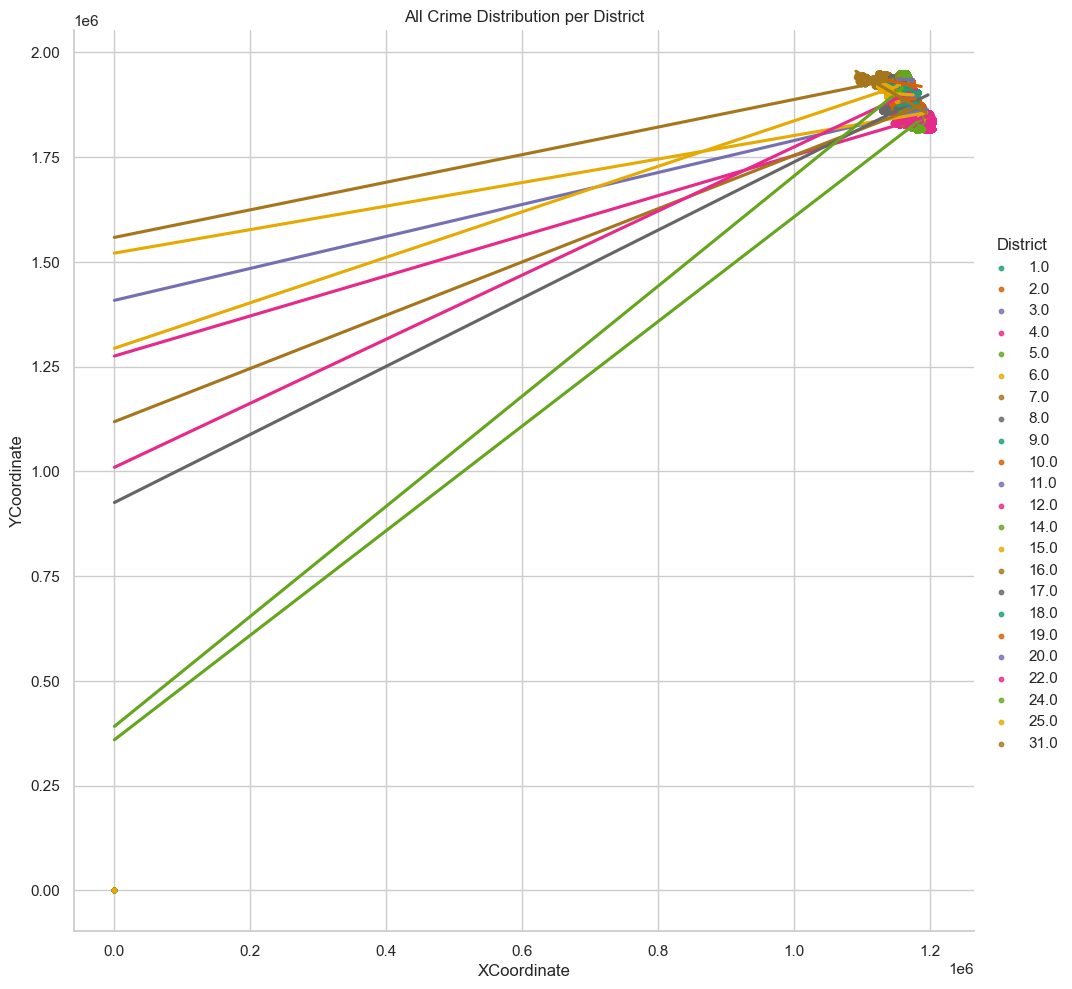

In [103]:
sns.lmplot('XCoordinate', 'YCoordinate',
           data=crimedf[:],
           fit_reg=True, 
           hue="District",
           palette='Dark2',
           height=10,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

This means there are outliers in the dataset. We will now trest for outliers

ValueError: num must be 1 <= num <= 12, not 13

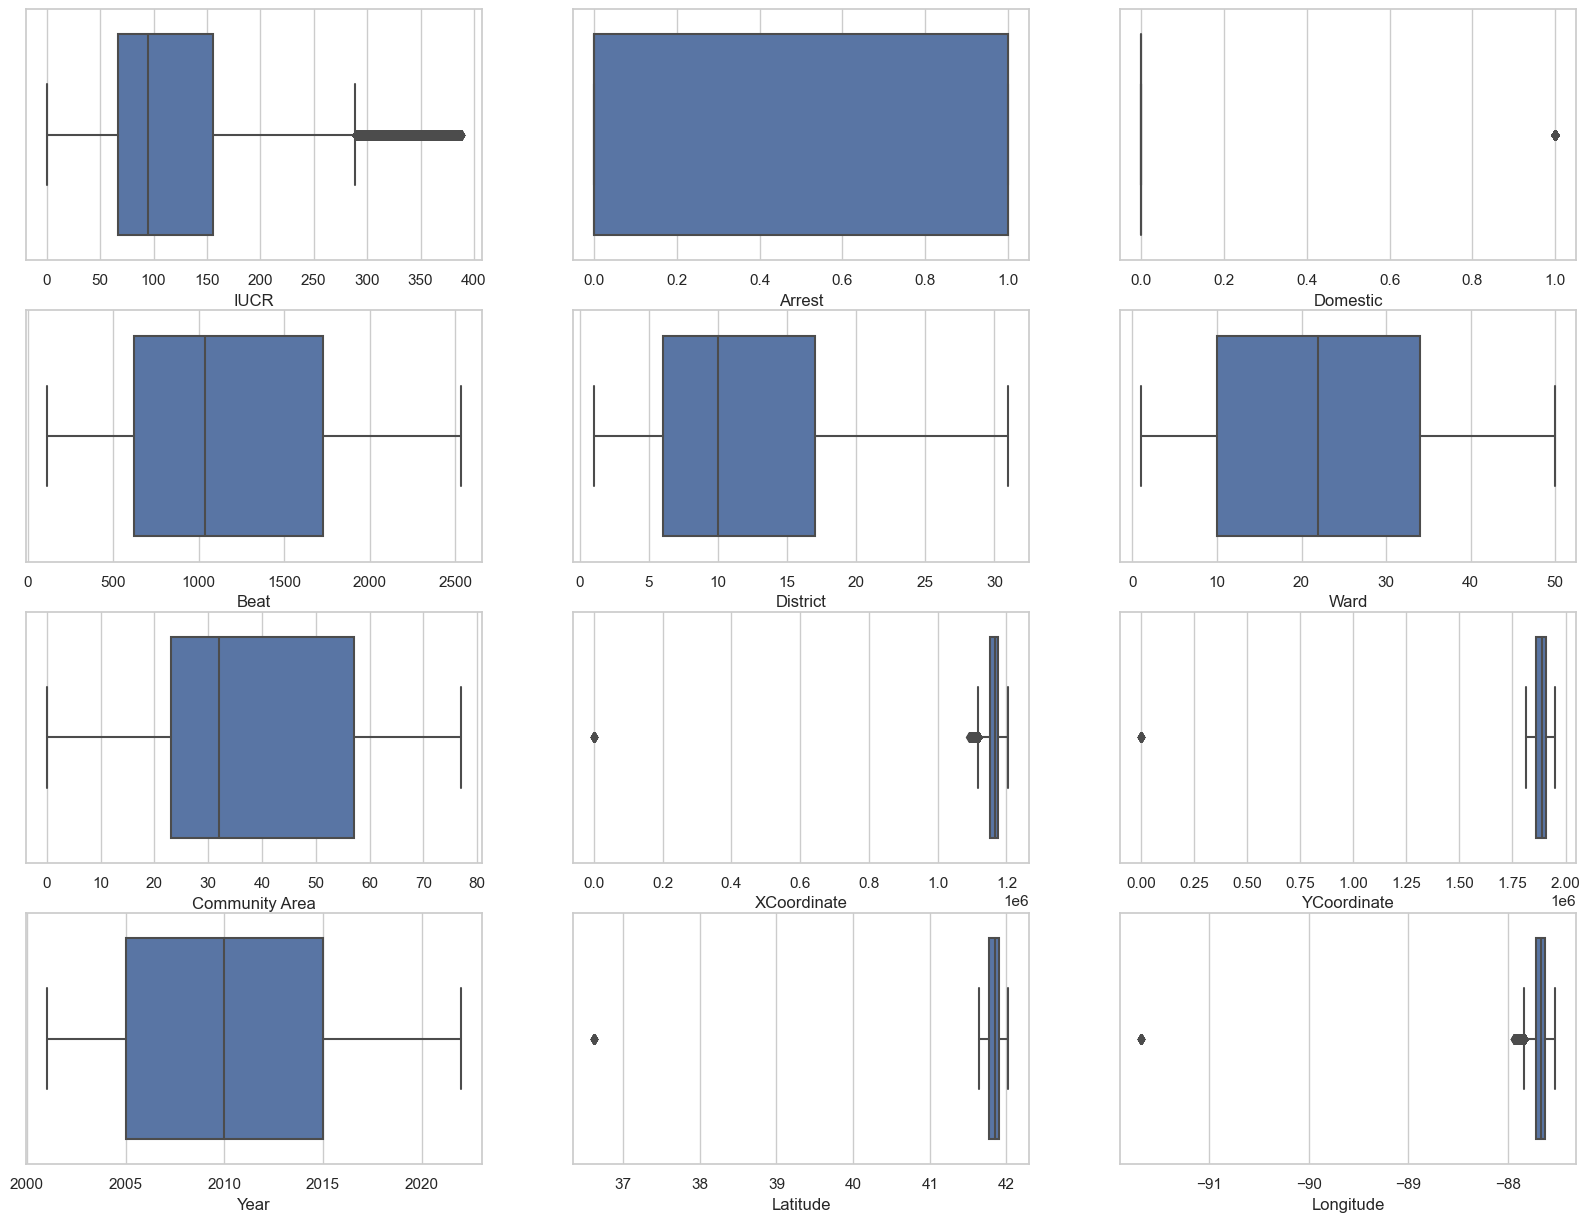

In [104]:
plt.figure(figsize = (20, 15))
for i in range (len(crimedf.columns)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x = crimedf.iloc[:, i])
    plt.xlabel(crimedf.columns[i], size = 12)

## Removing outliers

In [105]:
#def Outliers(crimeData, feature):
IQ1 = crimedf.quantile(0.25) 
IQ3 = crimedf.quantile(0.75)
IQR = IQ3 - IQ1
lower_bound = IQ1 - 1.2 * IQR
upper_bound = IQ3 + 1.2 * IQR
crimedf = crimedf[~(crimedf < lower_bound) | (crimedf > upper_bound) ]
crimedf

C:\Users\ACER\AppData\Local\Temp\ipykernel_15052\1924003776.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  crimedf = crimedf[~(crimedf < lower_bound) | (crimedf > upper_bound) ]


IUCR  Arrest  Domestic  Beat  District  Ward  Community Area  \
0         156       0         0   423       4.0  10.0            46.0   
1         174       1         0   413       4.0   8.0            47.0   
2          83       1         0  1711      17.0  39.0            12.0   
3          77       0         0  1115      11.0  28.0            26.0   
4          63       0         0  1231      12.0  27.0            28.0   
...       ...     ...       ...   ...       ...   ...             ...   
2070576    87       0         0  1633      16.0  38.0            15.0   
2070577    77       1         0  1832      18.0  42.0             8.0   
2070578    77       0         1   213       2.0   4.0            38.0   
2070579   162       0         0  1831      18.0  42.0             8.0   
2070580   249       1         0  1434      14.0   1.0            24.0   

         XCoordinate  YCoordinate  Year   Latitude  Longitude  \
0          1196638.0    1848800.0  2008  41.739980 -87.555120   
1          1184499.0    1843935.0  2018  41.726922 -87.599747   
2          1146911.0    1941022.0  2007  41.994138 -87.734959   
3          1148388.0    1899882.0  2018  41.881217 -87.730590   
4          1165430.0    1897441.0  2021  41.874174 -87.668082   
...              ...          ...   ...        ...        ...   
2070576    1138111.0    1922705.0  2008  41.944038 -87.767774   
2070577    1175423.0    1904617.0  2016  41.893647 -87.631177   
2070578    1181989.0    1878827.0  2006  41.822727 -87.607863   
2070579    1174469.0    1904732.0  2017  41.893984 -87.634677   
2070580    1158782.0    1910845.0  2004  41.911094 -87.692123   

                              Location  CrimeTypeCat  DescriptionCat  \
0        (41.739979622, -87.555120042)             5             460   
1        (41.726922145, -87.599746995)            32             466   
2        (41.994137622, -87.734959049)             3             215   
3        (41.881217483, -87.730589961)             1             419   
4        (41.874173691, -87.668082118)             1              25   
...                                ...           ...             ...   
2070576  (41.944038314, -87.767774454)            31             332   
2070577  (41.893646656, -87.631177143)             1             419   
2070578   (41.82272748, -87.607863136)             1             419   
2070579  (41.893983593, -87.634677382)             7             460   
2070580   (41.91109424, -87.692122762)            17             349   

         locDescriptionCat  crimeMonthCat  crimeDayCat  crimePeriodCat  \
0                    171.0              5            2               0   
1                    139.0              5            5               2   
2                    145.0              0            0               2   
3                    125.0              5            1               2   
4                    134.0              5            3               2   
...                    ...            ...          ...             ...   
2070576              190.0              2            6               2   
2070577               60.0             10            0               0   
2070578               17.0              8            6               3   
2070579              135.0             10            6               3   
2070580              171.0              6            6               3   

         FBICodeCat  
0                16  
1                17  
2                 6  
3                 9  
4                 4  
...             ...  
2070576           7  
2070577           9  
2070578           9  
2070579          25  
2070580          20  

[2070581 rows x 20 columns]

In [106]:
print(len(crimedf))

2070581


In [107]:
crimedf.isna().sum()

IUCR                     0
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     0
Community Area           0
XCoordinate          16339
YCoordinate             28
Year                     0
Latitude                28
Longitude            16175
Location                 0
CrimeTypeCat             0
DescriptionCat           0
locDescriptionCat     4506
crimeMonthCat            0
crimeDayCat              0
crimePeriodCat           0
FBICodeCat               0
dtype: int64

In [108]:
crimedf.dropna(inplace=True)

ValueError: num must be 1 <= num <= 12, not 13

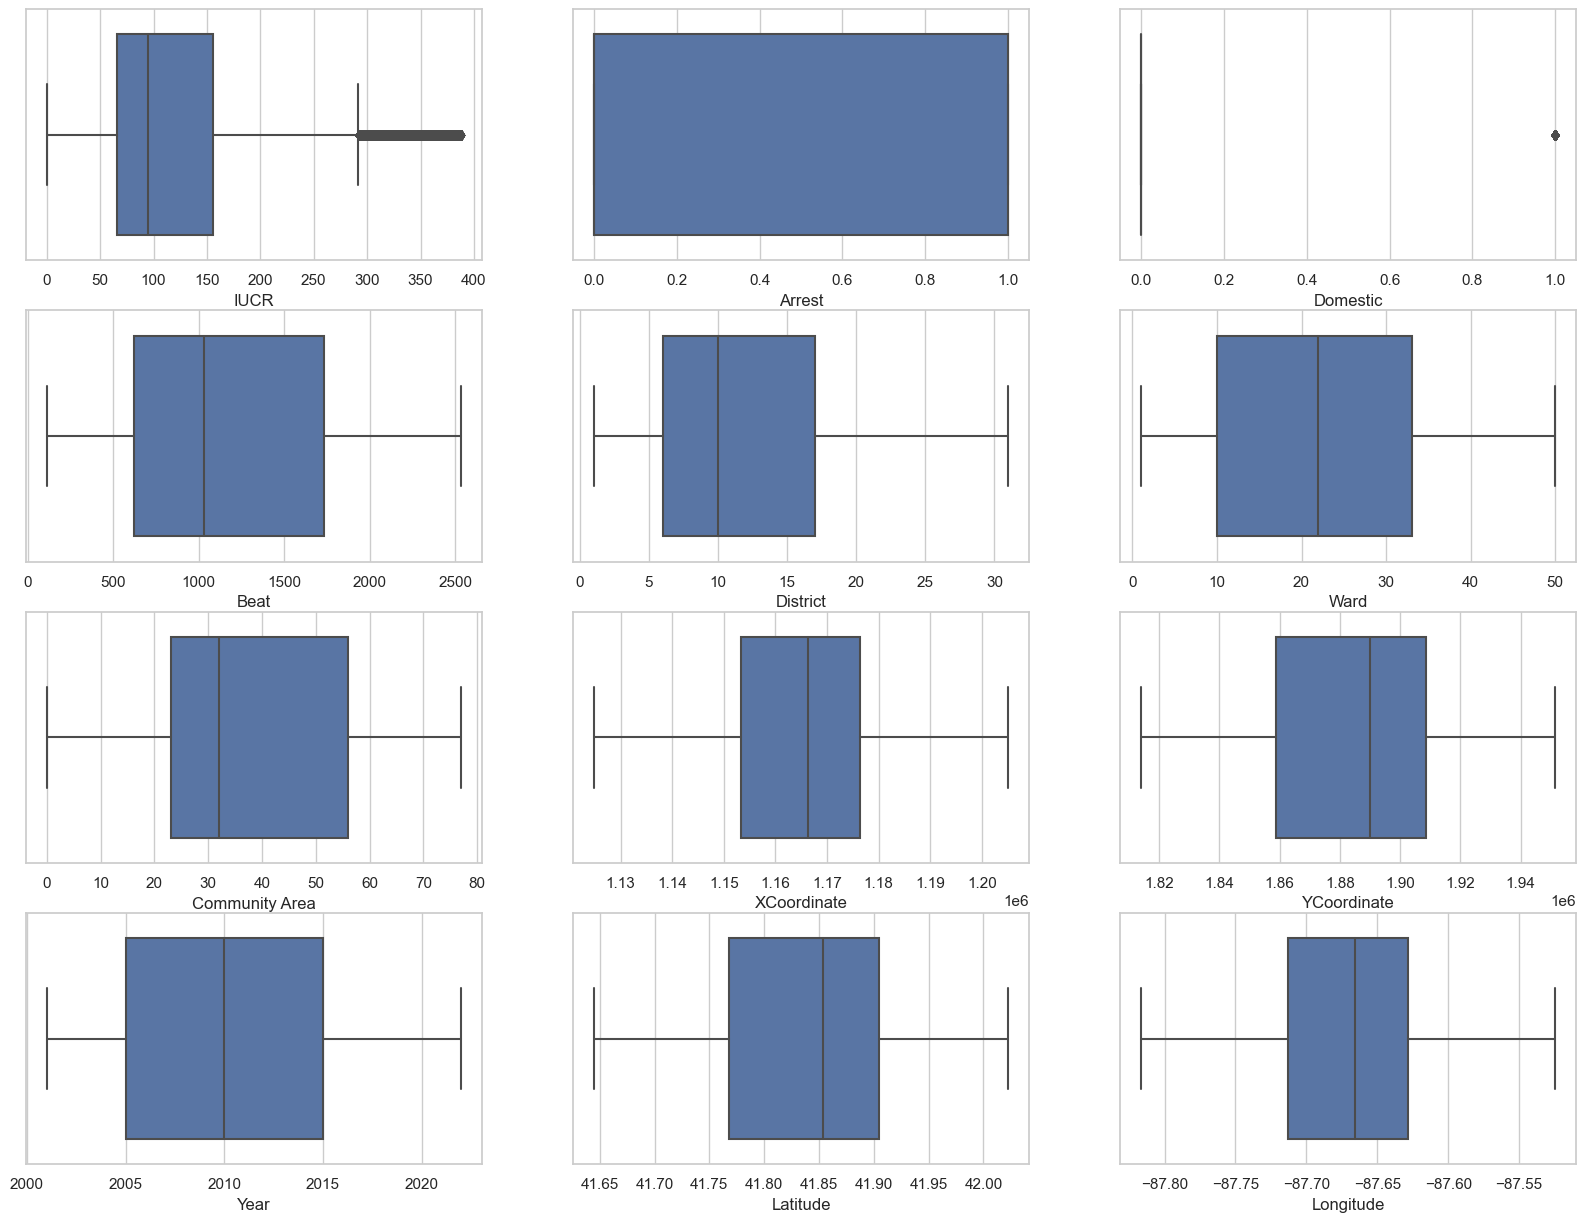

In [109]:
plt.figure(figsize = (20, 15))
for i in range (len(crimedf.columns)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x = crimedf.iloc[:, i])
    plt.xlabel(crimedf.columns[i], size = 12)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(crimedf.corr(), cmap = 'coolwarm', annot = True)
plt.show()

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'All Crime Distribution per District')

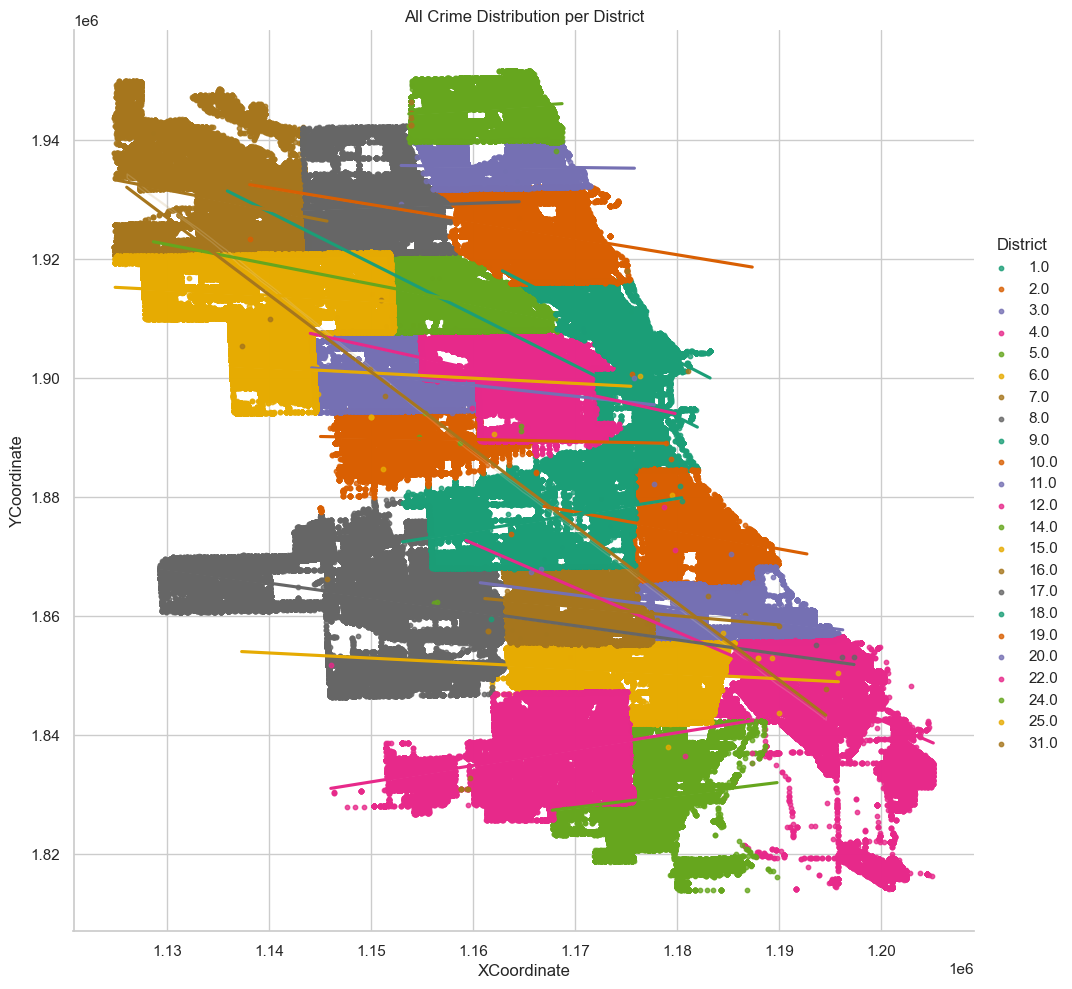

In [110]:
sns.lmplot('XCoordinate', 'YCoordinate',
           data=crimedf[:],
           fit_reg=True, 
           hue="District",
           palette='Dark2',
           height=10,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("All Crime Distribution per District")

<AxesSubplot:xlabel='XCoordinate', ylabel='YCoordinate'>

C:\Users\ACER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


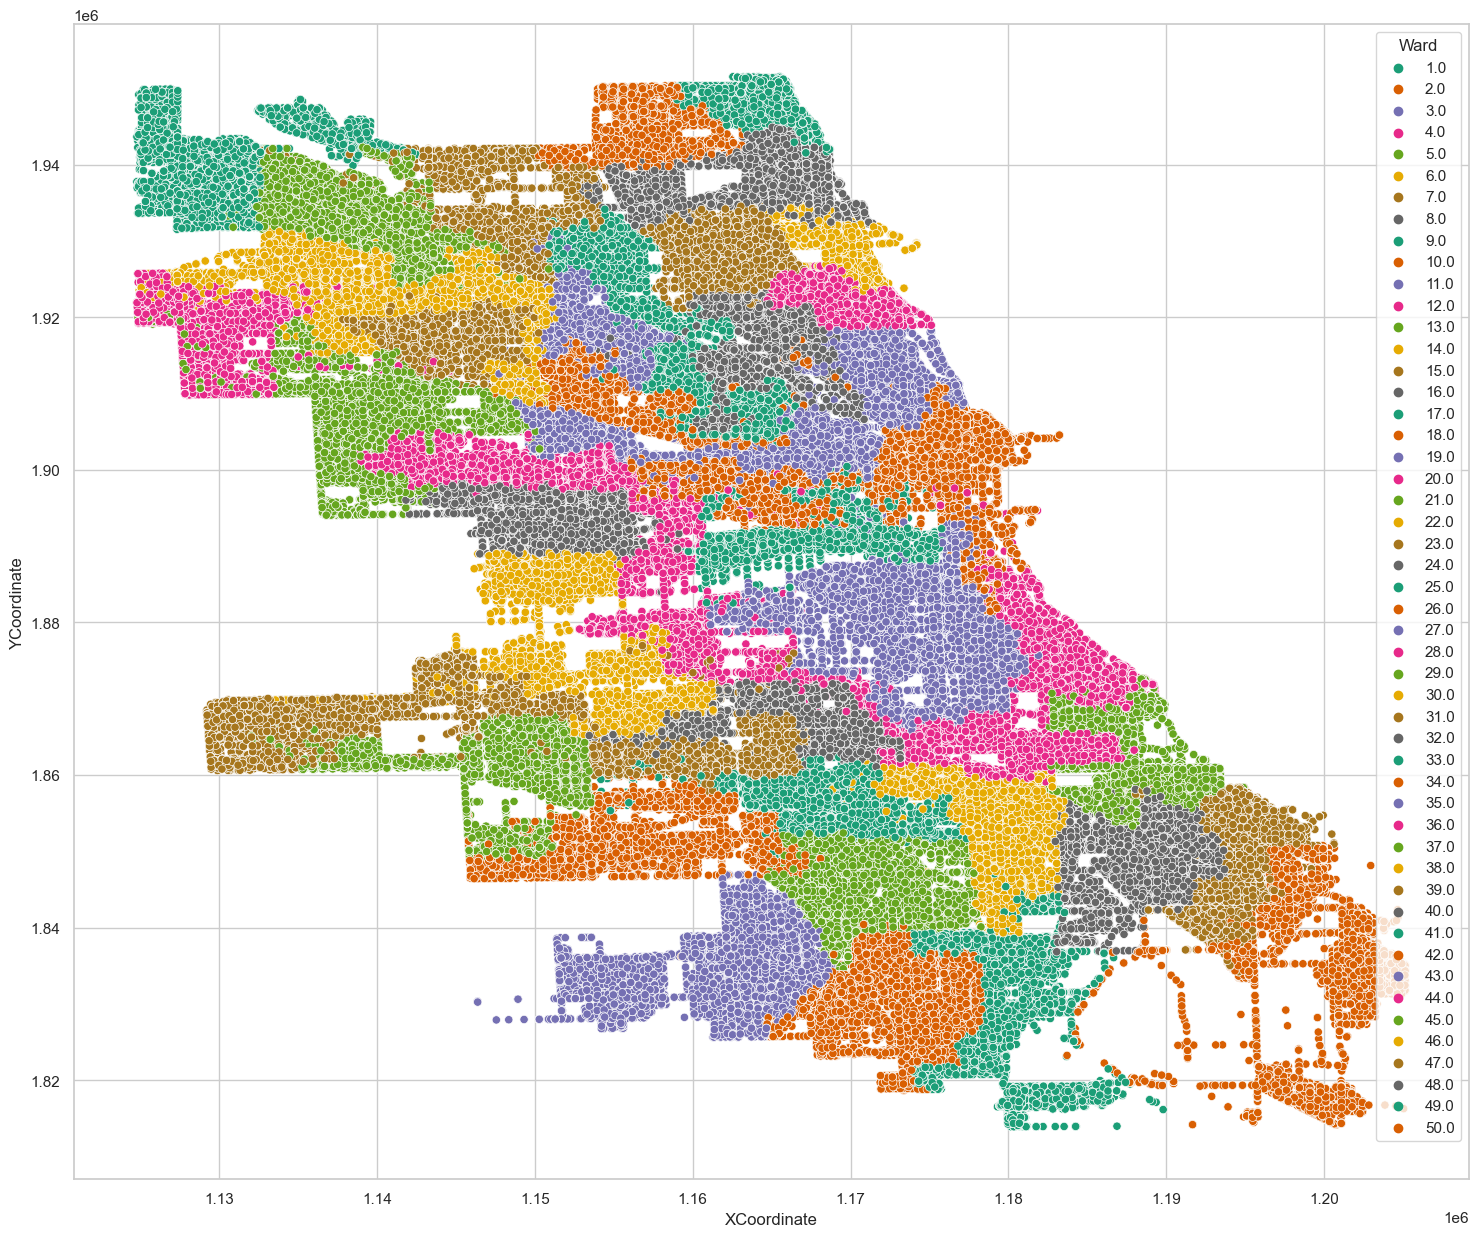

In [111]:
plt.figure(figsize = (18, 15))
sns.scatterplot(x='XCoordinate', y='YCoordinate', hue='Ward', palette='Dark2', data=crimedf)

In [ ]:
#The target variables are Ward, crimeDayCat, crimePeriodCat
#The independent variables are CrimeDataCat, IUCR, Beat, District, month, Year, Domestic, Arrest

In [112]:
crimedf.to_csv ('C:/Users/Acer/Documents/WorkSpace/cleandf.csv', index = False, header=True)

## Feature Selection

In [114]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn import preprocessing
 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


cleandf = pd.read_csv('C:/Users/Acer/Documents/WorkSpace/cleandf.csv')
cleandf.head()

IUCR  Arrest  Domestic  Beat  District  Ward  Community Area  XCoordinate  \
0   156       0         0   423       4.0  10.0            46.0    1196638.0   
1   174       1         0   413       4.0   8.0            47.0    1184499.0   
2    83       1         0  1711      17.0  39.0            12.0    1146911.0   
3    77       0         0  1115      11.0  28.0            26.0    1148388.0   
4    63       0         0  1231      12.0  27.0            28.0    1165430.0   

   YCoordinate  Year   Latitude  Longitude                       Location  \
0    1848800.0  2008  41.739980 -87.555120  (41.739979622, -87.555120042)   
1    1843935.0  2018  41.726922 -87.599747  (41.726922145, -87.599746995)   
2    1941022.0  2007  41.994138 -87.734959  (41.994137622, -87.734959049)   
3    1899882.0  2018  41.881217 -87.730590  (41.881217483, -87.730589961)   
4    1897441.0  2021  41.874174 -87.668082  (41.874173691, -87.668082118)   

   CrimeTypeCat  DescriptionCat  locDescriptionCat  crimeMonthCat  \
0             5             460              171.0              5   
1            32             466              139.0              5   
2             3             215              145.0              0   
3             1             419              125.0              5   
4             1              25              134.0              5   

   crimeDayCat  crimePeriodCat  FBICodeCat  
0            2               0          16  
1            5               2          17  
2            0               2           6  
3            1               2           9  
4            3               2           4

In [115]:
targetVar= cleandf[['Ward', 'crimeDayCat', 'crimePeriodCat']]
predictorsVars = cleandf[['CrimeTypeCat','IUCR', 'Arrest', 'Domestic', 'Beat', 'Year', 'XCoordinate', 'YCoordinate', 'FBICodeCat', 'crimeMonthCat', 'District', 'DescriptionCat', 'locDescriptionCat', 'Latitude', 'Longitude', 'Community Area']]

## Normalizing the data
Scaler = Normalizer().fit(predictorsVars)
normPredictorsVars = Scaler.transform(predictorsVars)

## Splitting the data into x and y in preparation for feature selection for Ward prediction
targetVarArray = targetVar.values
x = normPredictorsVars
y = targetVarArray[:,[0]]

In [116]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, train_size=0.80, random_state=1)
print('Train', xtrain.shape, ytrain.shape)
print('Test', xtest.shape, ytest.shape)

Train (1640516, 16) (1640516, 1)
Test (410129, 16) (410129, 1)


## Applying Recursive feature elimination (RFE) using DecisionTreeClassifier as the base model to select the features for the model

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit RFE
rfe.fit(x, y)
# summarize all features
for i in range(x.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.971 (0.000)
Column: 0, Selected False, Rank: 7.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 9.000
Column: 3, Selected False, Rank: 10.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 8.000
Column: 9, Selected False, Rank: 5.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected False, Rank: 4.000
Column: 12, Selected False, Rank: 2.000
Column: 13, Selected False, Rank: 11.000
Column: 14, Selected False, Rank: 6.000
Column: 15, Selected True, Rank: 1.000


In [119]:
colnames = ['CrimeTypeCat',0, 'IUCR', 1, 'Arrest', 2, 'Domestic',3, 'Beat',4, 'Year',5, 'XCoordinate',6, 'YCoordinate',7,
            'FBICodeCat',8, 'crimeMonthCat',9, 'District',10, 'DescriptionCat',11, 'locDescriptionCat',12, 
            'Latitude',13, 'Longitude',14, 'Community Area',15]
for name in colnames:
    
    print(name)

CrimeTypeCat
0
IUCR
1
Arrest
2
Domestic
3
Beat
4
Year
5
XCoordinate
6
YCoordinate
7
FBICodeCat
8
crimeMonthCat
9
District
10
DescriptionCat
11
locDescriptionCat
12
Latitude
13
Longitude
14
Community Area
15


Selected Features are: Beat, Year, XCoordinate, YCoordinate, District, Community Area

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(x.corr(), cmap = 'coolwarm', annot = True)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

targetVarArray = targetVar.values
x = normPredictorsVars
y2 = targetVarArray[:,[1]]

xtrain, xtest, y2train, y2test=train_test_split(x, y2, train_size=0.70, random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)0.70
n_scores = cross_val_score(pipeline, x, y2, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit RFE
rfe.fit(x, y2)
# summarize all features
for i in range(x.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.154 (0.001)
Column: 0, Selected False, Rank: 10.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 5.000
Column: 3, Selected False, Rank: 9.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 8.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 2.000
Column: 13, Selected False, Rank: 11.000
Column: 14, Selected False, Rank: 7.000
Column: 15, Selected False, Rank: 4.000


Selected Features are: Beat, Year, XCoordinate, YCoordinate, crimeMonthCat, DescriptionCat

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

targetVarArray = targetVar.values
x = normPredictorsVars
y3 = targetVarArray[:,[2]]

xtrain, xtest, y3train, y3test=train_test_split(x, y3, train_size=0.70, random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
model = DecisionTreeClassifier()

pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)
n_scores = cross_val_score(pipeline, x, y3, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit RFE
rfe.fit(x, y3)
# summarize all features
for i in range(x.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.338 (0.001)
Column: 0, Selected False, Rank: 5.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 10.000
Column: 3, Selected False, Rank: 7.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 8.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected False, Rank: 2.000
Column: 13, Selected False, Rank: 11.000
Column: 14, Selected False, Rank: 9.000
Column: 15, Selected False, Rank: 4.000


Selected Features are Beat, Year, XCoordinate, YCoordinate, crimeMonthCat, DescriptionCat

In [ ]:
# from the results of the feature selection, we will select Beat, Year, XCoordinate, YCoordinate, crimeMonthCat, District, 
# DescriptionCat, and Community Area as our features. Because the prediction is by Crime type it will be included.


In [120]:
# Creating a new independent variables from the feature selection results
xnewdf = cleandf[['CrimeTypeCat', 'Beat', 'Year', 'XCoordinate', 'YCoordinate', 'crimeMonthCat', 'District', 'DescriptionCat', 'Community Area']]

xnewdf.head()

CrimeTypeCat  Beat  Year  XCoordinate  YCoordinate  crimeMonthCat  \
0             5   423  2008    1196638.0    1848800.0              5   
1            32   413  2018    1184499.0    1843935.0              5   
2             3  1711  2007    1146911.0    1941022.0              0   
3             1  1115  2018    1148388.0    1899882.0              5   
4             1  1231  2021    1165430.0    1897441.0              5   

   District  DescriptionCat  Community Area  
0       4.0             460            46.0  
1       4.0             466            47.0  
2      17.0             215            12.0  
3      11.0             419            26.0  
4      12.0              25            28.0

In [121]:
xnewdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050645 entries, 0 to 2050644
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   CrimeTypeCat    int64  
 1   Beat            int64  
 2   Year            int64  
 3   XCoordinate     float64
 4   YCoordinate     float64
 5   crimeMonthCat   int64  
 6   District        float64
 7   DescriptionCat  int64  
 8   Community Area  float64
dtypes: float64(4), int64(5)
memory usage: 140.8 MB


In [122]:
# target variable
targetVar=targetVar.astype(int)

In [123]:
print(targetVar.Ward.unique())
print(targetVar.crimeDayCat.unique())
print(targetVar.crimePeriodCat.unique())

[10  8 39 28 27 29 37 26 35 14  1 17  3 44 36  4  2  6  7 40 42 20 13 11
 34 47 33  9 21 45 25 24 15 16 19 43 30 23 32 31 22 50 49  5 46 12 38 18
 48 41]
[2 5 0 1 3 6 4]
[0 2 3 1]


In [124]:
#ycol = ['Ward', 'dayCat', 'periodCat']
#ydf = pd.DataFrame(targetVarArray, columns=ycol)
dfConcat = [xnewdf, targetVar]
newdf = pd.concat(dfConcat, axis = 1)
newdf

CrimeTypeCat  Beat  Year  XCoordinate  YCoordinate  crimeMonthCat  \
0                   5   423  2008    1196638.0    1848800.0              5   
1                  32   413  2018    1184499.0    1843935.0              5   
2                   3  1711  2007    1146911.0    1941022.0              0   
3                   1  1115  2018    1148388.0    1899882.0              5   
4                   1  1231  2021    1165430.0    1897441.0              5   
...               ...   ...   ...          ...          ...            ...   
2050640            31  1633  2008    1138111.0    1922705.0              2   
2050641             1  1832  2016    1175423.0    1904617.0             10   
2050642             1   213  2006    1181989.0    1878827.0              8   
2050643             7  1831  2017    1174469.0    1904732.0             10   
2050644            17  1434  2004    1158782.0    1910845.0              6   

         District  DescriptionCat  Community Area  Ward  crimeDayCat  \
0             4.0             460            46.0    10            2   
1             4.0             466            47.0     8            5   
2            17.0             215            12.0    39            0   
3            11.0             419            26.0    28            1   
4            12.0              25            28.0    27            3   
...           ...             ...             ...   ...          ...   
2050640      16.0             332            15.0    38            6   
2050641      18.0             419             8.0    42            0   
2050642       2.0             419            38.0     4            6   
2050643      18.0             460             8.0    42            6   
2050644      14.0             349            24.0     1            6   

         crimePeriodCat  
0                     0  
1                     2  
2                     2  
3                     2  
4                     2  
...                 ...  
2050640               2  
2050641               0  
2050642               3  
2050643               3  
2050644               3  

[2050645 rows x 12 columns]

## Modelling using MultiOutputClassier

In [125]:
import math
newdf['Ward']=newdf['Ward'].astype(int)
#newdf['periodCat'] = newdf['periodCat'].astype(int)

In [126]:
#Splitting the data into X and Y
array = newdf.values
X =array[:, 0:9]
Y =array[:, [9,10,11]]

Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
print('Train', Xtrain.shape, Ytrain.shape)
print('Test', Xtest.shape, Ytest.shape)

Train (1640516, 9) (1640516, 3)
Test (410129, 9) (410129, 3)


>knn -1.124 (0.003)
>cart -1.179 (0.002)
>lr -3.037 (0.004)


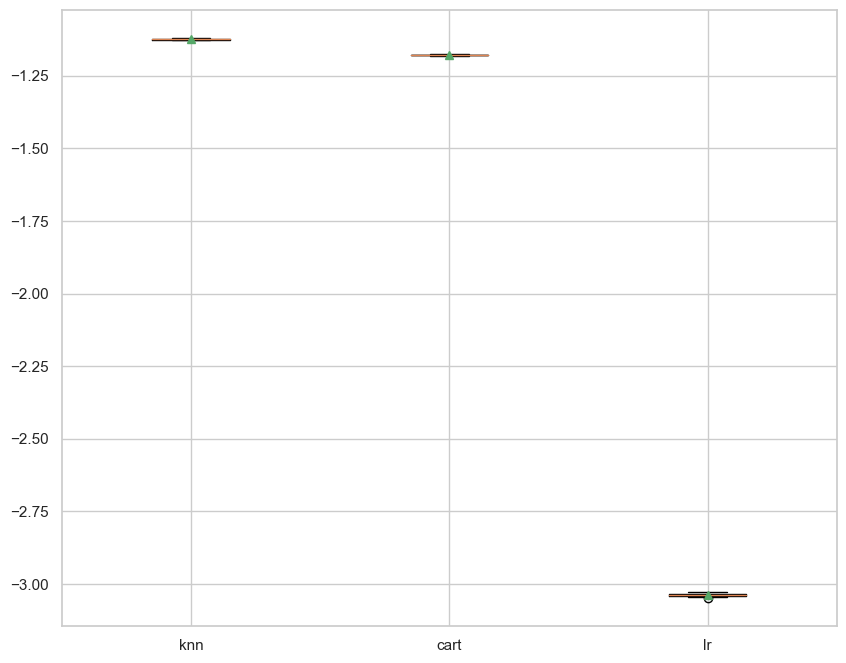

In [127]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold


# get a list of models to evaluate
def get_models(): #creates the models we wish to evaluate
    models = dict()
    models['knn'] = KNeighborsRegressor()
    models['cart'] = DecisionTreeRegressor()
    models['lr'] = LinearRegression()
    #models['rf'] = RandomForestRegressor() it cannot allocate memory
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, Y): #takes a model instance and returns a list of scores from three repeats of 10-fold cross-validation
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.figure(figsize=(10,8))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

3 algorithms have been applied to the dataset to enable us determine which one performs better.
Of all the models, knn performs the best with about -1.124 mean absolute error.
Note: RandomForest did not run due to resource allocation issue on my computer.

## Using RegressorChain on the best performing Algorithm 

RegressorChain will allow the first model in the sequence use the input and predicts one output; 
the second model uses the input and the output from the first model to make a prediction; 
the third model uses the input and output from the first two models to make a prediction

In [128]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn import preprocessing
 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, mean_squared_error, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [129]:
from sklearn.multioutput import RegressorChain
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# define base model
model = KNeighborsRegressor()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.124 (0.003)


In [11]:
from sklearn.multioutput import RegressorChain
from numpy import absolute
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# define base model
model = KNeighborsRegressor()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 1.124 (0.003)


The result of the model using RegressorChain shows no major change in the MAE except that the MAE is now a positive 1.124.

In [130]:
# fit model
wrapper.fit(X, Y)
# make predictions on the entire training dataset
yhat = wrapper.predict(X)
# connect predictions with outputs
for i in range(10):
    print(X[i], yhat[i])

[5.000000e+00 4.230000e+02 2.008000e+03 1.196638e+06 1.848800e+06
 5.000000e+00 4.000000e+00 4.600000e+02 4.600000e+01] [8.8 3.4 2.4]
[3.200000e+01 4.130000e+02 2.018000e+03 1.184499e+06 1.843935e+06
 5.000000e+00 4.000000e+00 4.660000e+02 4.700000e+01] [8.  4.2 2.4]
[3.000000e+00 1.711000e+03 2.007000e+03 1.146911e+06 1.941022e+06
 0.000000e+00 1.700000e+01 2.150000e+02 1.200000e+01] [39.   1.8  2. ]
[1.000000e+00 1.115000e+03 2.018000e+03 1.148388e+06 1.899882e+06
 5.000000e+00 1.100000e+01 4.190000e+02 2.600000e+01] [28.   3.2  2.6]
[1.000000e+00 1.231000e+03 2.021000e+03 1.165430e+06 1.897441e+06
 5.000000e+00 1.200000e+01 2.500000e+01 2.800000e+01] [7.  3.2 2.2]
[2.800000e+01 1.513000e+03 2.006000e+03 1.139154e+06 1.896536e+06
 1.000000e+01 1.500000e+01 4.310000e+02 2.500000e+01] [29.   3.8  2.6]
[1.700000e+01 2.534000e+03 2.014000e+03 1.147306e+06 1.908305e+06
 2.000000e+00 2.500000e+01 3.490000e+02 2.300000e+01] [37.   2.2  2.6]
[1.600000e+01 1.422000e+03 2.010000e+03 1.154458e+

In [131]:
result = wrapper.score(X, Y)
print("Accuracy: {}".format(result*100.0))

Accuracy: 46.705265977028134


## TESTING THE MODEL WITH UNSEEN DATA

Testing the model with the unseen data that was stored earlier as nullWardVals(Where ward was null)
The dataset has been preprocessed to only include the input variables

In [19]:
# Importing the dataset
newWarddf = pd.read_csv('C:/Users/User/Documents/WorkSpace/CommAreaPredict.csv')
newWarddf

CrimeTypeCat    Beat    Year  XCoordinate  YCoordinate  crimeMonthCat  \
0               29.0  2113.0  2001.0    1174343.0    1885951.0            1.0   
1                2.0  2113.0  2002.0    1176681.0    1888910.0            4.0   
2                9.0   725.0  2001.0    1167101.0    1860991.0            7.0   
3               17.0   922.0  2001.0    1165949.0    1881994.0            0.0   
4                2.0  2513.0  2001.0    1130490.0    1912121.0            9.0   
...              ...     ...     ...          ...          ...            ...   
181934           2.0  1232.0  2001.0    1169878.0    1893534.0            5.0   
181935           2.0  1111.0  2002.0    1149495.0    1905045.0            7.0   
181936           2.0  1722.0  2001.0    1148593.0    1930796.0            9.0   
181937          29.0  2234.0  2001.0    1170502.0    1831224.0            4.0   
181938           2.0  1523.0  2001.0    1141137.0    1902008.0           11.0   

        District  DescriptionCat  Community Area  
0            2.0           154.0            46.0  
1            1.0           195.0            47.0  
2            7.0           100.0            12.0  
3            9.0           170.0            26.0  
4           25.0           195.0            28.0  
...          ...             ...             ...  
181934      12.0           195.0             8.0  
181935      11.0           195.0            28.0  
181936      17.0           195.0            53.0  
181937      22.0           154.0             8.0  
181938      15.0           195.0            32.0  

[181939 rows x 9 columns]

In [20]:
nArray = newWarddf.values
Xn =nArray[:, 0:9]
# make predictions on the unseen dataset
newPrediction = wrapper.predict(Xn)
# connect predictions with outputs
for i in range(10):
    print(Xn[i], newPrediction[i])

[2.900000e+01 2.113000e+03 2.001000e+03 1.174343e+06 1.885951e+06
 1.000000e+00 2.000000e+00 1.540000e+02 4.600000e+01] [11.   2.2  2. ]
[2.000000e+00 2.113000e+03 2.002000e+03 1.176681e+06 1.888910e+06
 4.000000e+00 1.000000e+00 1.950000e+02 4.700000e+01] [2.8 3.6 2.4]
[9.000000e+00 7.250000e+02 2.001000e+03 1.167101e+06 1.860991e+06
 7.000000e+00 7.000000e+00 1.000000e+02 1.200000e+01] [17.   2.6  2.8]
[1.700000e+01 9.220000e+02 2.001000e+03 1.165949e+06 1.881994e+06
 0.000000e+00 9.000000e+00 1.700000e+02 2.600000e+01] [11.2  3.2  2.2]
[2.000000e+00 2.513000e+03 2.001000e+03 1.130490e+06 1.912121e+06
 9.000000e+00 2.500000e+01 1.950000e+02 2.800000e+01] [36.   2.6  2.2]
[2.600000e+01 2.521000e+03 2.002000e+03 1.141601e+06 1.920126e+06
 0.000000e+00 2.500000e+01 2.900000e+01 2.500000e+01] [30.8  2.6  2.2]
[3.000000e+01 2.031000e+03 2.001000e+03 1.160625e+06 1.932465e+06
 4.000000e+00 2.000000e+01 2.330000e+02 2.300000e+01] [47.   1.2  1.6]
[2.900000e+01 1.933000e+03 2.001000e+03 1.16

In [20]:
column= ['WardPred', 'crimeDayPred', 'crimePeriodPred']
newPred = pd.DataFrame(data=newPrediction, columns=column, )
newPred.round()

WardPred  crimeDayPred  crimePeriodPred
0           11.0           2.0              2.0
1            3.0           4.0              2.0
2           17.0           3.0              3.0
3           11.0           3.0              2.0
4           36.0           3.0              2.0
...          ...           ...              ...
181934      25.0           3.0              2.0
181935      37.0           3.0              1.0
181936      39.0           3.0              1.0
181937      34.0           4.0              1.0
181938      28.0           2.0              2.0

[181939 rows x 3 columns]

In [ ]:
['Afternoon', 'Morning', 'Night', 'Evening']
[0 2 3 1]

['Sat ', 'Tue ', 'Fri ', 'Mon ', 'Sun ', 'Wed ', 'Thu ']
[2 5 0 1 3 6 4]

['CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'BURGLARY', 'ASSAULT', ..., 'HUMAN TRAFFICKING', 'OBSCENITY', 'RITUALISM', 'NON-CRIMINAL (SUBJECT SPECIFIED)']
[ 5 32  3  1 28 17 16  2 23 24  8 31 13 12  7 30 21 26  6 10 15 29 14  0
  9  4 25 18 22 11 20 27 19]

In [ ]:
# The model worked on the unseen data to predict the missing values in Ward feature.

## Model Result

3 algorithms have been applied to the dataset to determine which one performs better. Of all the models, 
KNN algorithm performs the best with about -1.124 mean absolute error. Note: RandomForest did not run due to resource allocation issue on my computer.

RegressorChain was implemented using KNN as the base model. This is to allow the first model in the sequence use the input and predicts one output; the second model uses the input and the output from the first model to make a prediction; the third model uses the input and output from the first two models to make a prediction.

The result of the model using RegressorChain shows no major change in the MAE except that the MAE is now a positive 1.124.
The Model achieved an Accuracy: 46.71

Testing the model with the unseen data that was stored earlier as nullWardVals(Where ward was null)
The dataset was preprocessed to only include the input variables

The Model Predicted the missing value in the ward feature

## USING TRAIN-TEST-SPLIT METHOD IN A PIPELINE

In [30]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)

LRPipeline=Pipeline([('LR',LinearRegression())])
LRPipeline.fit(Xtrain,Ytrain)
print(LRPipeline.score(Xtest, Ytest))
LRPipeline.predict(Xtest)
#print('{}Test Accuracy: {}'.format(LRPipeline.score(Xtest,Ytest)))

0.18365456236950325


array([[22.70649483,  3.00409149,  2.00254422],
       [24.37062946,  2.96913904,  1.99977404],
       [23.29029723,  2.99693458,  1.9906755 ],
       ...,
       [14.36321288,  2.97818799,  1.99576278],
       [34.59398836,  2.9448086 ,  1.95893356],
       [14.80425068,  2.9869138 ,  1.95506399]])

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
pipelr = Pipeline(steps=[('dt_Multi', MultiOutputRegressor(LinearRegression()))])
pipelr.fit(Xtrain, Ytrain)
pipelr.score(Xtest, Ytest)
print(pipelr.score(Xtest, Ytest))

0.1836545623695035


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
pipelr = Pipeline(steps=[('dt_Multi', MultiOutputRegressor(KNeighborsRegressor()))])
pipelr.fit(Xtrain, Ytrain)
pipelr.score(Xtest, Ytest)
print(pipelr.score(Xtest, Ytest))

0.20139257422937598


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
pipelr = Pipeline(steps=[('dt_Multi', MultiOutputRegressor(DecisionTreeRegressor()))])
pipelr.fit(Xtrain, Ytrain)
pipelr.score(Xtest, Ytest)
print(pipelr.score(Xtest, Ytest))

-0.3218716327772824


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
pipelr = Pipeline(steps=[('dt_Multi', MultiOutputRegressor(LogisticRegression()))])
pipelr.fit(Xtrain, Ytrain)
pipelr.score(Xtest, Ytest)
print(pipelr.score(Xtest, Ytest))

-1.0529446151617667


In [14]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
model = DecisionTreeRegressor()
model.fit(Xtrain, Ytrain)
DTPredict = model.predict(Xtest)
print(model.score(Xtest, Ytest))
DTPredict

-0.3408060909602178


array([[35.,  0.,  2.],
       [30.,  5.,  3.],
       [35.,  0.,  2.],
       ...,
       [ 1.,  4.,  1.],
       [ 7.,  5.,  2.],
       [ 7.,  6.,  3.]])

In [10]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(Xtrain, Ytrain)
print(model.score(Xtest, Ytest))
knPre=model.predict(Xtest)
knPre

0.15573698433961836


array([[30.4,  4. ,  2.4],
       [34. ,  3.6,  2.8],
       [35. ,  2.2,  2.6],
       ...,
       [16. ,  5. ,  2.2],
       [ 7.2,  3.8,  2.6],
       [ 7.2,  2.4,  2.6]])

In [15]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X, Y, train_size=0.80, random_state=1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xtrain, Ytrain)
print(model.score(Xtest, Ytest))
lrPre=model.predict(Xtest)
lrPre.round()

0.18365456236950325


array([[23.,  3.,  2.],
       [24.,  3.,  2.],
       [23.,  3.,  2.],
       ...,
       [14.,  3.,  2.],
       [35.,  3.,  2.],
       [15.,  3.,  2.]])

In [ ]:
#Testing the model wih the kep data where Ward in null

In [59]:
nullWardVals.shape

(184695, 23)

In [58]:
nullWardVals.head()

Unnamed: 0       ID Case Number                    Date  \
5            5  1699235     G498287  08/21/2001 12:00:00 AM   
19          19  1932758    HH104177  01/02/2002 05:00:00 PM   
30          30  1496484     G223033  03/20/2001 12:01:00 AM   
56          56  1469842     G192777  04/05/2001 12:07:52 PM   
66          66  1844943     G674809  11/09/2001 09:15:07 AM   

                    Block  IUCR        Primary Type  Description  \
5           003XX W 28 PL  0810               THEFT    OVER $500   
19       023XX S STATE ST  0460             BATTERY       SIMPLE   
30     065XX S JUSTINE ST  1120  DECEPTIVE PRACTICE      FORGERY   
56  034XX S MARSHFIELD AV  2027           NARCOTICS  POSS: CRACK   
66   019XX N NEWCASTLE AV  0460             BATTERY       SIMPLE   

   Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
5                STREET   False  ...   NaN             NaN        06   
19        CHA APARTMENT   False  ...   NaN             NaN       08B   
30            RESIDENCE   False  ...   NaN             NaN        10   
56               STREET    True  ...   NaN             NaN        18   
66            RESIDENCE   False  ...   NaN             NaN       08B   

    X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
5      1174343.0     1885951.0  2001  08/17/2015 03:03:40 PM  41.842450   
19     1176681.0     1888910.0  2002  10/26/2018 04:01:05 PM  41.850517   
30     1167101.0     1860991.0  2001  08/17/2015 03:03:40 PM  41.774115   
56     1165949.0     1881994.0  2001  08/17/2015 03:03:40 PM  41.831775   
66     1130490.0     1912121.0  2001  08/17/2015 03:03:40 PM  41.915129   

    Longitude                       Location  
5  -87.635701  (41.842450075, -87.635700695)  
19 -87.627032  (41.850517353, -87.627031661)  
30 -87.662991  (41.774115391, -87.662991148)  
56 -87.666617   (41.83177464, -87.666616946)  
66 -87.796030  (41.915129101, -87.796030123)  

[5 rows x 23 columns]

In [21]:
newdf.columns

Index(['CrimeTypeCat', 'Beat', 'Year', 'XCoordinate', 'YCoordinate',
       'crimeMonthCat', 'District', 'DescriptionCat', 'Community Area', 'Ward',
       'crimeDayCat', 'crimePeriodCat'],
      dtype='object')

In [60]:
nullWardVals.drop(['Unnamed: 0'], axis=1, inplace = True)
nullWardVals.drop(['ID'], axis=1, inplace = True)
nullWardVals.drop(['Updated On'], axis=1, inplace = True)
nullWardVals.drop(['Case Number'], axis=1, inplace = True)
nullWardVals.drop(['Block'], axis=1, inplace = True)
nullWardVals.drop(['Longitude'], axis=1, inplace = True)
nullWardVals.drop(['Location'], axis=1, inplace = True)
nullWardVals.drop(['FBI Code'], axis=1, inplace = True)
nullWardVals.drop(['Latitude'], axis=1, inplace = True)
nullWardVals.drop(['Location Description'], axis=1, inplace = True)

In [61]:
nullWardVals

Date  IUCR        Primary Type  Description  \
5        08/21/2001 12:00:00 AM  0810               THEFT    OVER $500   
19       01/02/2002 05:00:00 PM  0460             BATTERY       SIMPLE   
30       03/20/2001 12:01:00 AM  1120  DECEPTIVE PRACTICE      FORGERY   
56       04/05/2001 12:07:52 PM  2027           NARCOTICS  POSS: CRACK   
66       11/09/2001 09:15:07 AM  0460             BATTERY       SIMPLE   
...                         ...   ...                 ...          ...   
2278669  03/21/2002 03:46:45 PM  0460             BATTERY       SIMPLE   
2278696  11/06/2001 04:01:00 PM  0460             BATTERY       SIMPLE   
2278704  01/02/2001 09:00:00 AM  0810               THEFT    OVER $500   
2278712  03/16/2002 04:05:54 AM  1310     CRIMINAL DAMAGE  TO PROPERTY   
2278722  09/11/2001 10:20:00 PM  0460             BATTERY       SIMPLE   

         Arrest  Domestic  Beat  District  Ward  Community Area  X Coordinate  \
5         False     False  2113       2.0   NaN             NaN     1174343.0   
19        False      True  2113       1.0   NaN             NaN     1176681.0   
30        False      True   725       7.0   NaN             NaN     1167101.0   
56         True     False   922       9.0   NaN             NaN     1165949.0   
66        False      True  2513      25.0   NaN             NaN     1130490.0   
...         ...       ...   ...       ...   ...             ...           ...   
2278669   False     False  1111      11.0   NaN             NaN     1149495.0   
2278696   False      True  1722      17.0   NaN             NaN     1148593.0   
2278704   False     False  2234      22.0   NaN             NaN     1170502.0   
2278712   False     False   623       6.0   NaN             NaN           NaN   
2278722   False      True  1523      15.0   NaN             NaN     1141137.0   

         Y Coordinate  Year  
5           1885951.0  2001  
19          1888910.0  2002  
30          1860991.0  2001  
56          1881994.0  2001  
66          1912121.0  2001  
...               ...   ...  
2278669     1905045.0  2002  
2278696     1930796.0  2001  
2278704     1831224.0  2001  
2278712           NaN  2002  
2278722     1902008.0  2001  

[184695 rows x 13 columns]

In [62]:
from dateutil.parser import parse
from datetime import datetime
tCol = nullWardVals.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening'
    elif row[1] =='PM' and int(row[0][11:13])>=6:
        period = 'Night'
    else:
        period = 'Unknown'

    dayList.append(day)
    monthList.append(month)
    periodList.append(period)

print(len(dayList), len(monthList), len(periodList))

nullWardVals['crimeMonth'] = monthList
nullWardVals['crimeDay'] = dayList
nullWardVals['crimePeriod']= periodList
nullWardVals.head()

184695 184695 184695


Date  IUCR        Primary Type  Description  Arrest  \
5   08/21/2001 12:00:00 AM  0810               THEFT    OVER $500   False   
19  01/02/2002 05:00:00 PM  0460             BATTERY       SIMPLE   False   
30  03/20/2001 12:01:00 AM  1120  DECEPTIVE PRACTICE      FORGERY   False   
56  04/05/2001 12:07:52 PM  2027           NARCOTICS  POSS: CRACK    True   
66  11/09/2001 09:15:07 AM  0460             BATTERY       SIMPLE   False   

    Domestic  Beat  District  Ward  Community Area  X Coordinate  \
5      False  2113       2.0   NaN             NaN     1174343.0   
19      True  2113       1.0   NaN             NaN     1176681.0   
30      True   725       7.0   NaN             NaN     1167101.0   
56     False   922       9.0   NaN             NaN     1165949.0   
66      True  2513      25.0   NaN             NaN     1130490.0   

    Y Coordinate  Year crimeMonth crimeDay crimePeriod  
5      1885951.0  2001        Aug     Tue      Morning  
19     1888910.0  2002        Jan     Wed      Evening  
30     1860991.0  2001        Mar     Tue      Morning  
56     1881994.0  2001        Apr     Thu        Night  
66     1912121.0  2001        Nov     Fri      Morning

In [63]:
nullWardVals.drop(['Date'], axis=1, inplace = True)
nullWardVals.drop(['IUCR'], axis=1, inplace = True)

In [64]:
nullWardVals.shape

(184695, 14)

<AxesSubplot:xlabel='X Coordinate'>

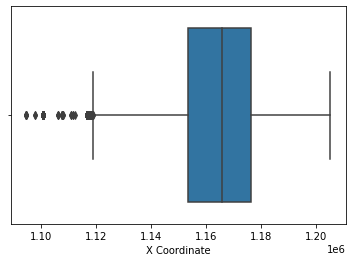

In [42]:
#plt.figure(figsize = (20, 15))
sns.boxplot(x = nullWardVals['X Coordinate'])
#sns.boxplot(x = nullWardVals['Y Coordinate'])
#plt.xlabel(nullWardVals.columns)

In [45]:
#def Outliers(crimeData, feature):
IQ1 = nullWardVals['X Coordinate'].quantile(0.25) 
IQ3 = nullWardVals['X Coordinate'].quantile(0.75)
IQR = IQ3 - IQ1
lower_bound = IQ1 - 1.2 * IQR
upper_bound = IQ3 + 1.2 * IQR
nullWardVals['X Coordinate'] = nullWardVals['X Coordinate'][(nullWardVals['X Coordinate'] < lower_bound) | (nullWardVals['X Coordinate'] > upper_bound) ]
nullWardVals['X Coordinate']

5         NaN
19        NaN
30        NaN
56        NaN
66        NaN
           ..
2278669   NaN
2278696   NaN
2278704   NaN
2278712   NaN
2278722   NaN
Name: X Coordinate, Length: 184695, dtype: float64

<AxesSubplot:xlabel='X Coordinate'>

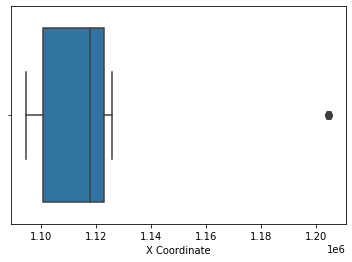

In [46]:
sns.boxplot(x = nullWardVals['X Coordinate'])

In [47]:
nullWardVals['X Coordinate'].dropna(axis=0)

1246       1100635.0
3496       1100658.0
3862       1100635.0
6064       1100635.0
7299       1100635.0
             ...    
2276010    1119819.0
2276021    1100635.0
2276154    1204896.0
2277722    1116672.0
2277966    1125714.0
Name: X Coordinate, Length: 1696, dtype: float64

<AxesSubplot:xlabel='X Coordinate'>

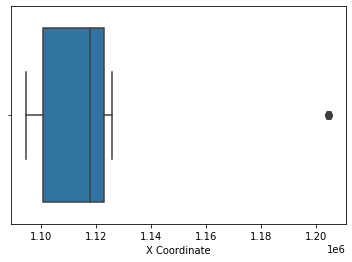

In [48]:
sns.boxplot(x = nullWardVals['X Coordinate'])

In [65]:
nullWardVals.rename(columns ={'Primary Type': 'CrimeType', 'X Coordinate':'XCoordinate', 'Y Coordinate':'YCoordinate', 'Location Description':'locationDescription'}, inplace = True)
nullWardVals.head()

CrimeType  Description  Arrest  Domestic  Beat  District  Ward  \
5                THEFT    OVER $500   False     False  2113       2.0   NaN   
19             BATTERY       SIMPLE   False      True  2113       1.0   NaN   
30  DECEPTIVE PRACTICE      FORGERY   False      True   725       7.0   NaN   
56           NARCOTICS  POSS: CRACK    True     False   922       9.0   NaN   
66             BATTERY       SIMPLE   False      True  2513      25.0   NaN   

    Community Area  XCoordinate  YCoordinate  Year crimeMonth crimeDay  \
5              NaN    1174343.0    1885951.0  2001        Aug     Tue    
19             NaN    1176681.0    1888910.0  2002        Jan     Wed    
30             NaN    1167101.0    1860991.0  2001        Mar     Tue    
56             NaN    1165949.0    1881994.0  2001        Apr     Thu    
66             NaN    1130490.0    1912121.0  2001        Nov     Fri    

   crimePeriod  
5      Morning  
19     Evening  
30     Morning  
56       Night  
66     Morning

In [66]:
nullWardVals['CrimeType'] = nullWardVals['CrimeType'].astype('category')
nullWardVals['CrimeTypeCat'] = nullWardVals['CrimeType'].cat.codes

nullWardVals['Description'] = nullWardVals['Description'].astype('category')
nullWardVals['DescriptionCat'] = nullWardVals['Description'].cat.codes

nullWardVals['crimeMonth'] = nullWardVals['crimeMonth'].astype('category')
nullWardVals['crimeMonthCat'] = nullWardVals['crimeMonth'].cat.codes

nullWardVals['crimeDay'] = nullWardVals['crimeDay'].astype('category')
nullWardVals['crimeDayCat'] = nullWardVals['crimeDay'].cat.codes

nullWardVals['crimePeriod'] = nullWardVals['crimePeriod'].astype('category')
nullWardVals['crimePeriodCat'] = nullWardVals['crimePeriod'].cat.codes

nullWardVals.Arrest = nullWardVals.Arrest.astype(int)
nullWardVals.Domestic = nullWardVals.Domestic.astype(int)

print(nullWardVals.CrimeType.unique())
print(nullWardVals.CrimeTypeCat.unique())


print(nullWardVals.crimePeriod.unique())
print(nullWardVals.crimePeriodCat.unique())


print(nullWardVals.crimeMonth.unique())
print(nullWardVals.crimeMonthCat.unique())


print(nullWardVals.crimeDay.unique())
print(nullWardVals.crimeDayCat.unique())


print(nullWardVals.crimeMonthCat.unique())
print(nullWardVals.crimeMonthCat.unique())

['THEFT', 'BATTERY', 'DECEPTIVE PRACTICE', 'NARCOTICS', 'ROBBERY', ..., 'HOMICIDE', 'CRIMINAL SEXUAL ASSAULT', 'OTHER NARCOTIC VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY']
Length: 31
Categories (31, object): ['THEFT', 'BATTERY', 'DECEPTIVE PRACTICE', 'NARCOTICS', ..., 'CRIMINAL SEXUAL ASSAULT', 'OTHER NARCOTIC VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'PUBLIC INDECENCY']
[29  2  9 17 26 30 27  6 21  1 16 22  3  8  0 24 25 15  5 19 13 18 10 14
 28 12 11  7 20  4 23]
['Morning', 'Evening', 'Night', 'Afternoon']
Categories (4, object): ['Morning', 'Evening', 'Night', 'Afternoon']
[2 1 3 0]
['Aug', 'Jan', 'Mar', 'Apr', 'Nov', ..., 'Feb', 'Jul', 'Dec', 'Jun', 'Oct']
Length: 12
Categories (12, object): ['Aug', 'Jan', 'Mar', 'Apr', ..., 'Jul', 'Dec', 'Jun', 'Oct']
[ 1  4  7  0  9 11  8  3  5  2  6 10]
['Tue ', 'Wed ', 'Thu ', 'Fri ', 'Sun ', 'Mon ', 'Sat ']
Categories (7, object): ['Tue ', 'Wed ', 'Thu ', 'Fri ', 'Sun ', 'Mon ', 'Sat ']
[5 6 4 0 3 1 2]
[ 1  4  7

In [67]:
nullWardVals.drop(['CrimeType'], axis=1, inplace = True)
nullWardVals.drop(['Description'], axis=1, inplace = True)
nullWardVals.drop(['crimeMonth'], axis=1, inplace = True)
nullWardVals.drop(['crimeDay'], axis=1, inplace = True)
nullWardVals.drop(['crimePeriod'], axis=1, inplace = True)

In [69]:
nullWardVals.isna().sum()

Arrest                 0
Domestic               0
Beat                   0
District               0
Ward              184695
Community Area    183900
XCoordinate         2756
YCoordinate         2756
Year                   0
CrimeTypeCat           0
DescriptionCat         0
crimeMonthCat          0
crimeDayCat            0
crimePeriodCat         0
dtype: int64